# <center> $ Lung Cancer Level Prediction $ <center>

This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue, weight loss ,shortness of breath ,wheezing ,swallowing difficulty ,clubbing of finger nails,frequent cold, dry cough and snoring

#### $Columns$


- Age: The age of the patient. (Numeric)
- Gender: The gender of the patient. (Categorical)
- Air Pollution: The level of air pollution exposure of the patient. (Categorical)
- Alcohol use: The level of alcohol use of the patient. (Categorical)
- Dust Allergy: The level of dust allergy of the patient. (Categorical)
- OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)
- Genetic Risk: The level of genetic risk of the patient. (Categorical)
- chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
- Balanced Diet: The level of balanced diet of the patient. (Categorical)
- Obesity: The level of obesity of the patient. (Categorical)
- Smoking: The level of smoking of the patient. (Categorical)
- Passive Smoker: The level of passive smoker of the patient. (Categorical)
- Chest Pain: The level of chest pain of the patient. (Categorical)
- Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
- Fatigue: The level of fatigue of the patient. (Categorical)
- Weight Loss: The level of weight loss of the patient. (Categorical)
- Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
- Wheezing: The level of wheezing of the patient. (Categorical)
- Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
- Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)
- Frequent Cold: The level of getting frequent cold of the patient. (Categorical)
- Dry Cough: The level of getting dry cough of the patient. (Categorical)
- Snoring: The level of snoring of a patient. (Categorical)

#### $Target$

- Level : Intensity of the cancer (Low,Medium or High)

## $ Importing Libraries $

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from scipy import stats
from scipy.stats import norm
from sklearn.tree import plot_tree

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

## $Load Data$

In [2]:
df_cancer=pd.read_csv("cancer patient data sets.csv")
df_cancer

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df_cancer.duplicated().sum()

0

## $Data  Description$

In [4]:
print('size =',df_cancer.size)
print('(row,column) =',df_cancer.shape)

size = 26000
(row,column) = (1000, 26)


In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df_cancer.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
# Value Counts of the columns in the dataset

for column in df_cancer.columns:
    print(df_cancer[column].value_counts())
    print('\n')

0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: index, Length: 1000, dtype: int64


P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: Patient Id, Length: 1000, dtype: int64


35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: Age, dtype: int64


1    598
2    402
Name: Gender, dtype: int64


6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: Air Pollution, dtype: int64


2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: Alcohol use, dtype: int64


7    405
4    133
5    111
6    110
3    101
2     70
1

## $ Data Preprocessing $

In [8]:
# Checking for Null values

df_cancer.isnull().any().sum()

0

- There is no missing data found in the dataset

- Seems like index and Patient Id are unique for every row and will thus deviate the accuracy of our model. So lets remove them

In [9]:
# Removing the columns 'Patient Id' and 'Index'
df_cancer.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
df_cancer

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


###### Replace "Level" with Integer

In [10]:
df_cancer['Level'].replace(to_replace = 'Low', value = 0, inplace = True)
df_cancer['Level'].replace(to_replace = 'Medium', value = 1, inplace = True)
df_cancer['Level'].replace(to_replace = 'High', value = 2, inplace = True)

df_cancer['Level'].value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

In [11]:
df_cancer.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


## $Exploratory Data Analysis$

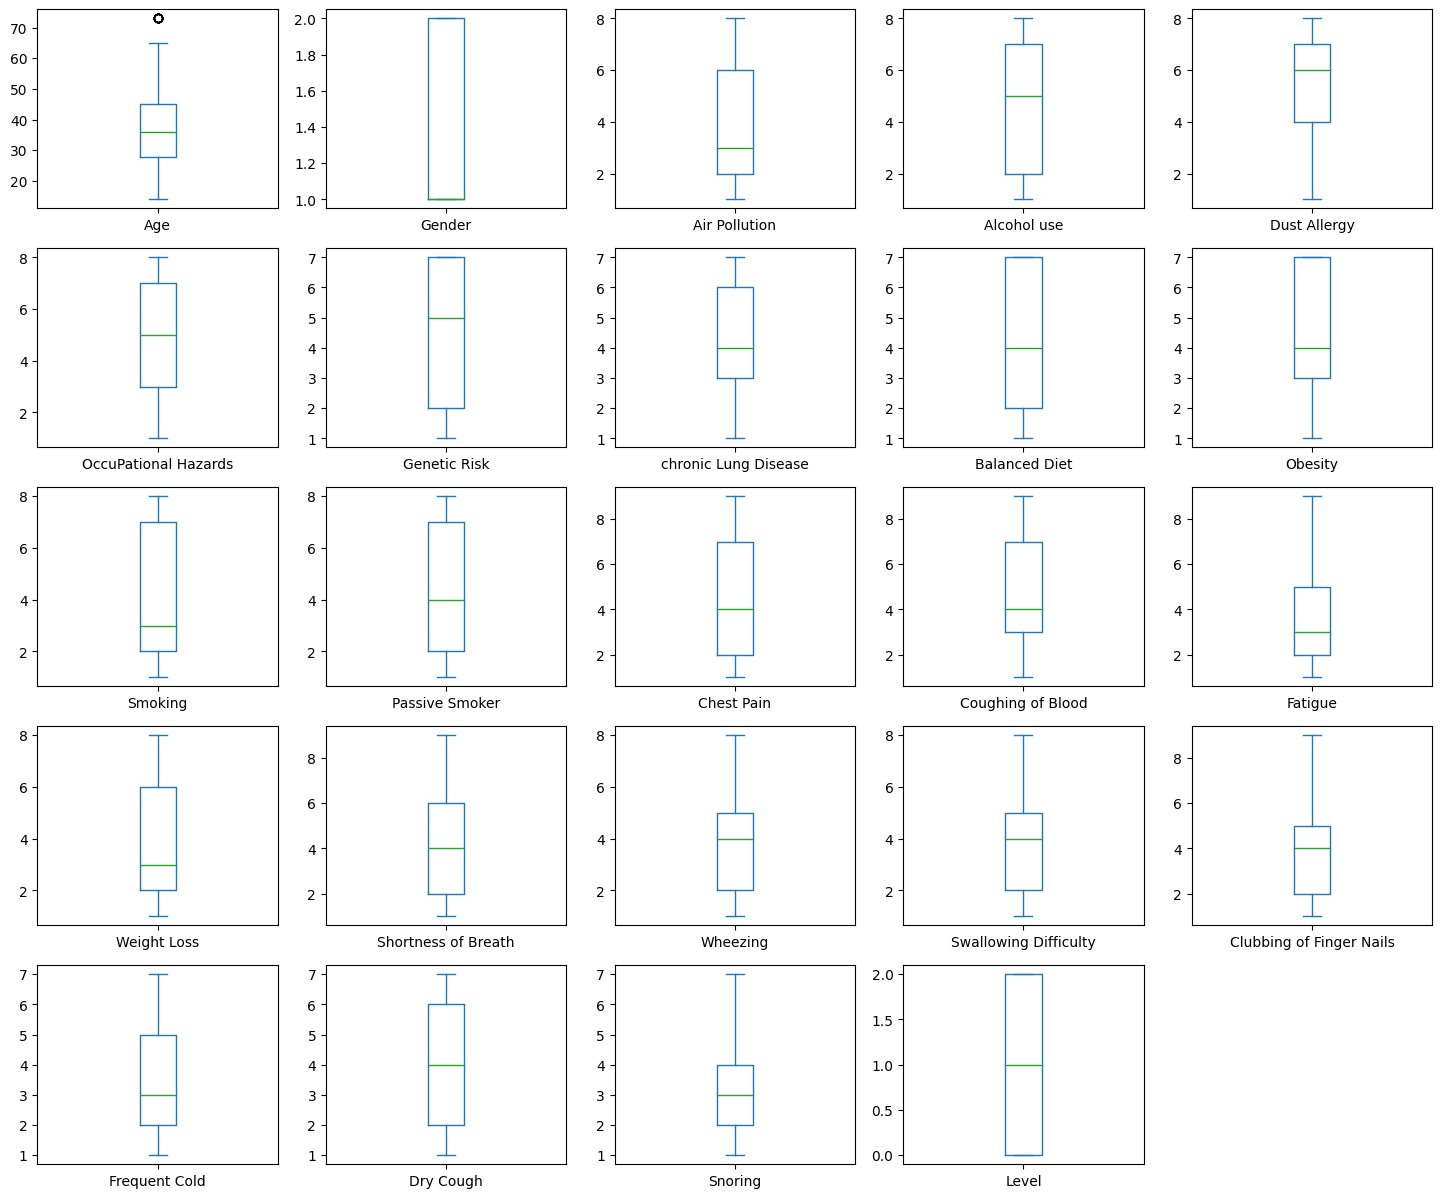

In [12]:
df_cancer.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

<AxesSubplot: title={'center': 'Age Column Box Plot'}>

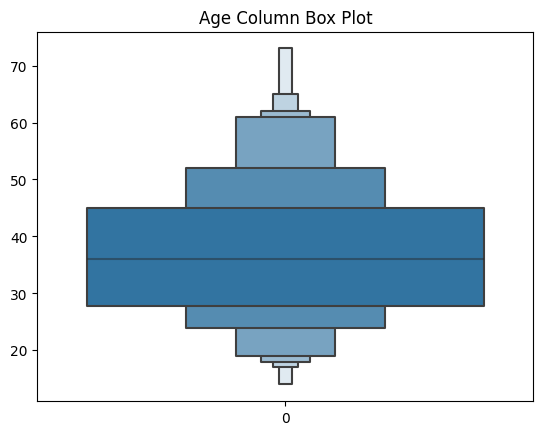

In [13]:
plt.title("Age Column Box Plot")
sns.boxenplot(df_cancer.Age)

- Here we see that our dataset has no outliers

In [14]:
df_cancer.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.827435


###### $Heatmap$

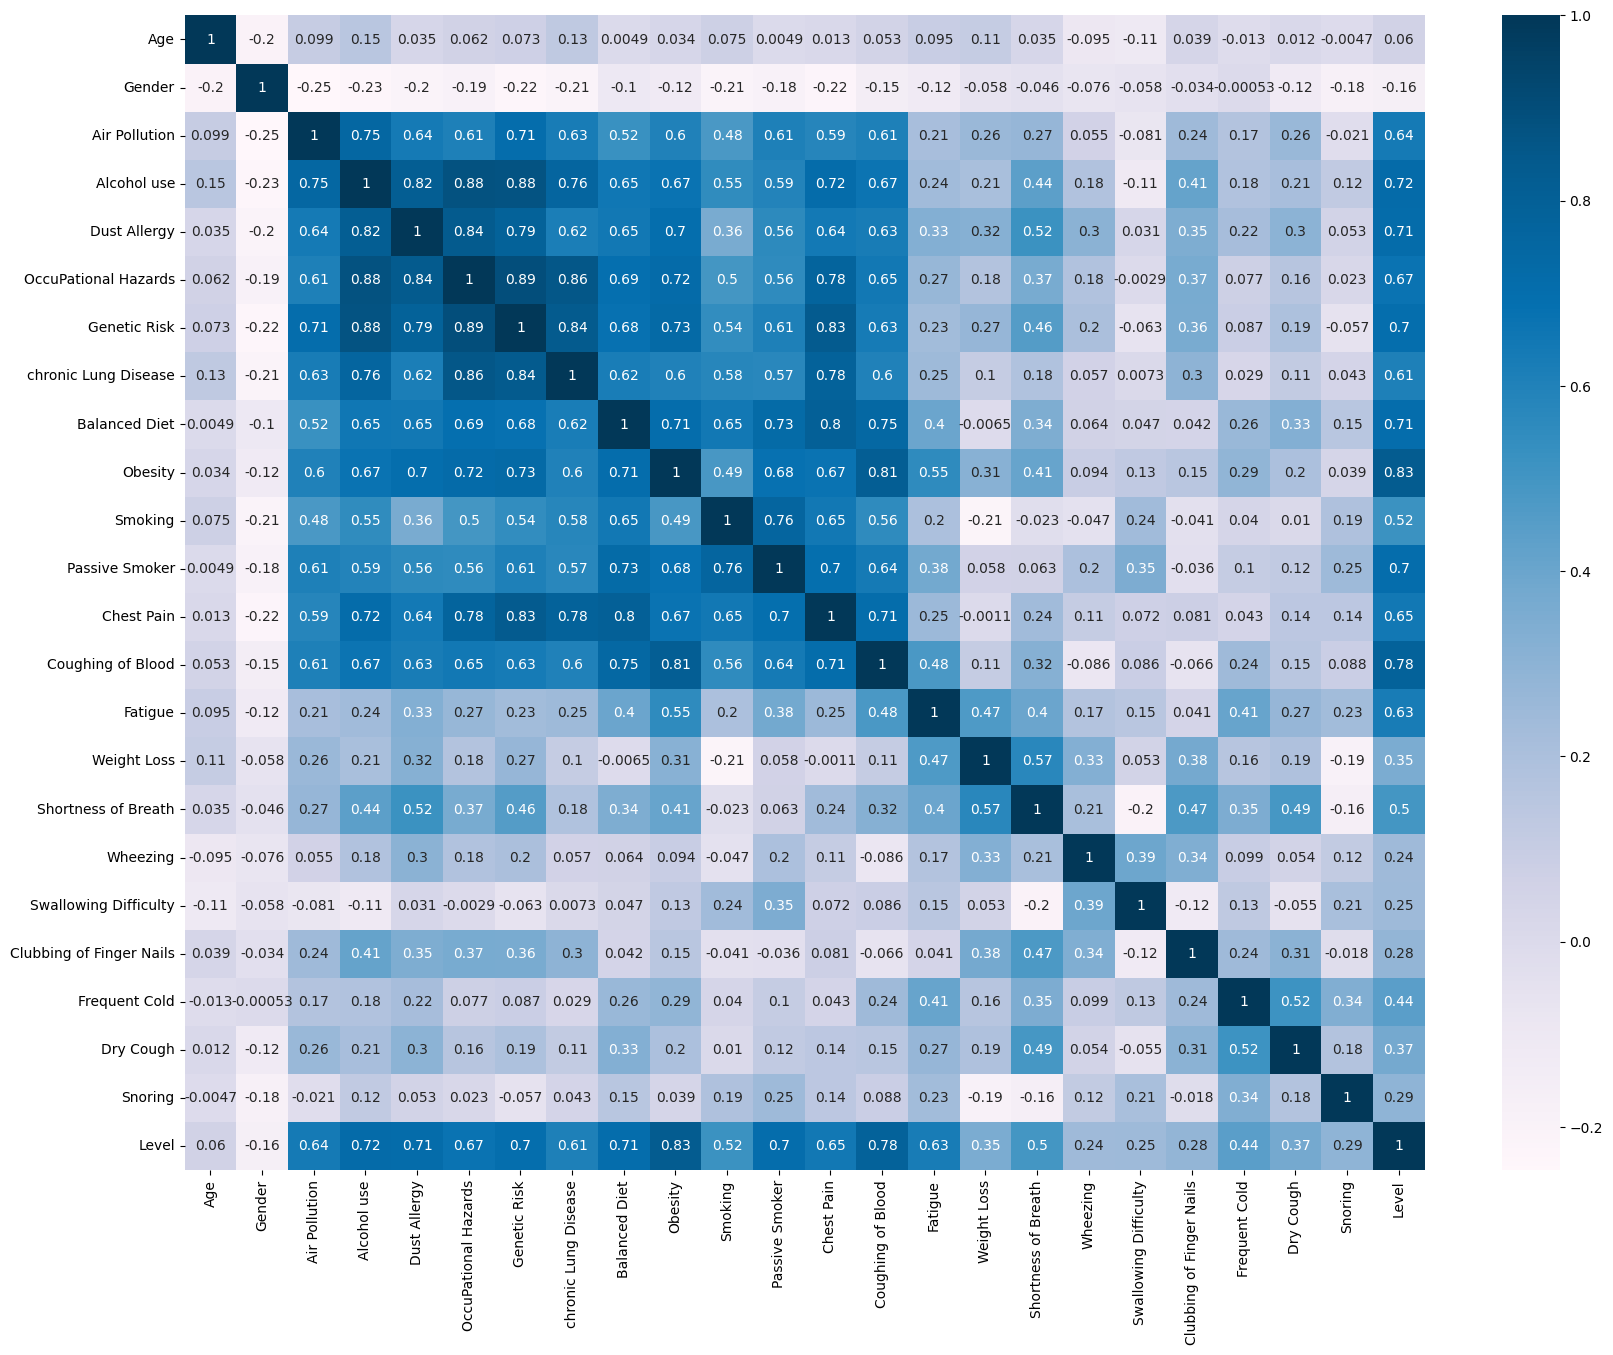

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

<AxesSubplot: >

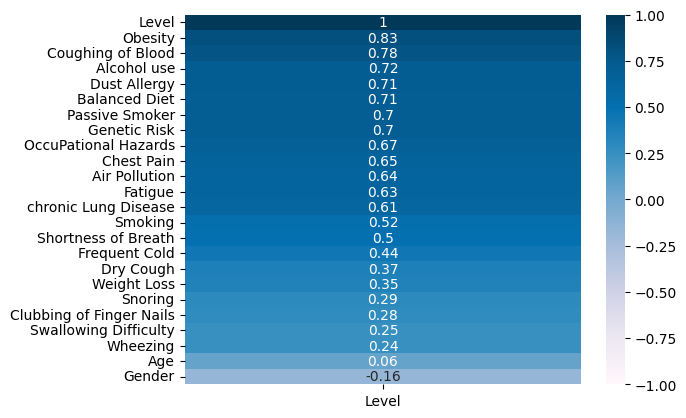

In [16]:
sns.heatmap(df_cancer.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuBu')

- It also shows us that obesity, alcohol use, balanced diet, Genetic risk, occupational hazards is strong correlated with lung caner, therefore we should be alert when these factors occur to us.

###### $Features Distribution$

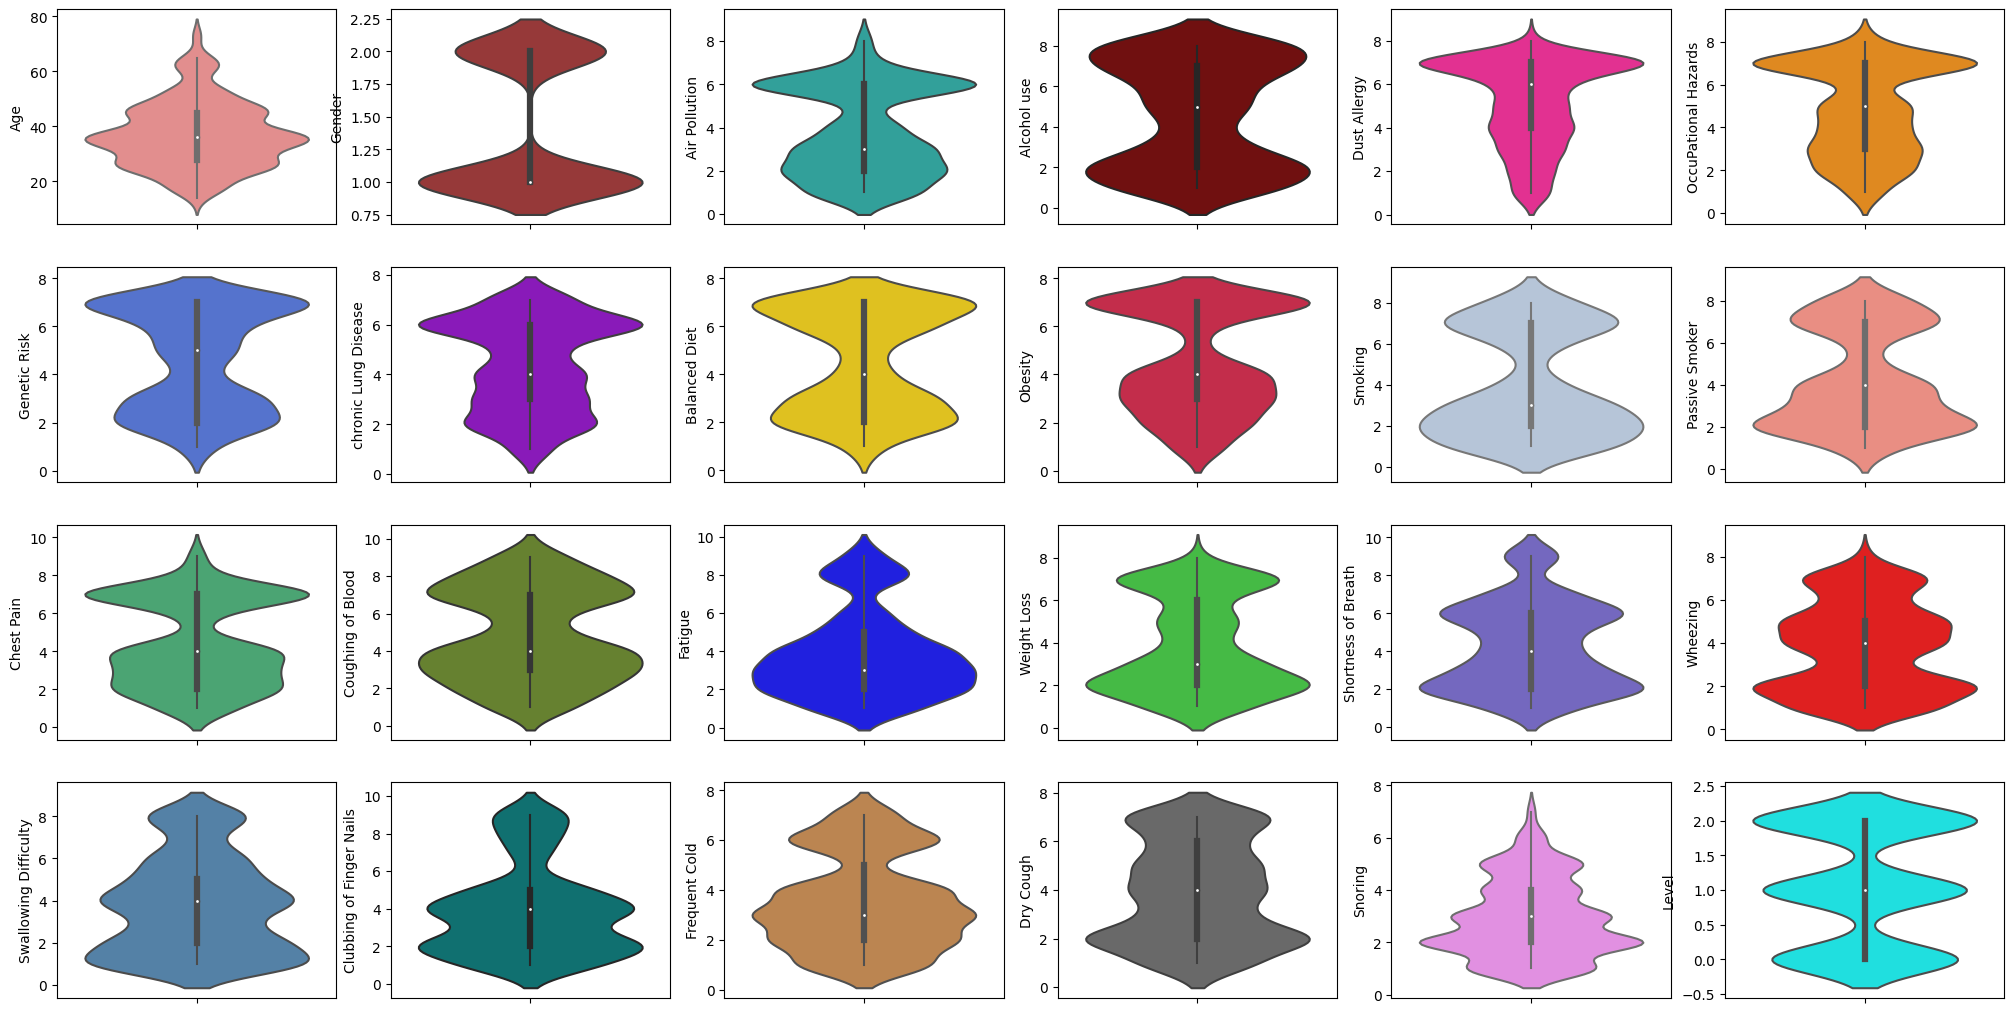

In [17]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(20, 10))
colors = ['lightcoral','brown','lightseagreen','maroon','deeppink','darkorange',
          'royalblue','darkviolet','gold','crimson','lightsteelblue','salmon','mediumseagreen',
          'olivedrab','blue','limegreen','slateblue','red','steelblue','teal','peru','dimgray','violet','cyan']
ax = ax.flatten()
i = 0

for col,_ in df_cancer.items():
    sns.violinplot(y=col, data=df_cancer, ax=ax[i],color=colors[i])
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)

<AxesSubplot: xlabel='Age', ylabel='Coughing of Blood'>

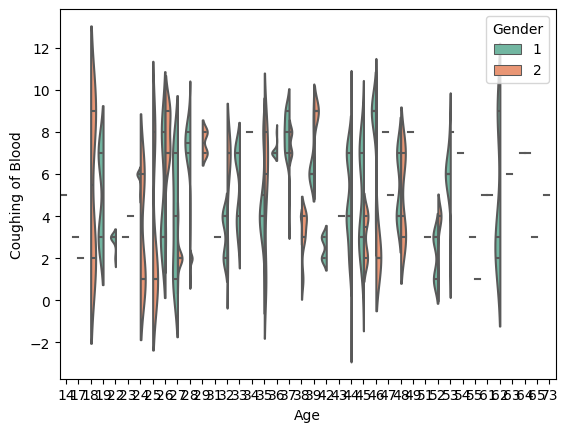

In [18]:
sns.violinplot(x="Age", y="Coughing of Blood", hue="Gender",data=df_cancer, palette="Set2", 
               split=True,scale="count", inner="quartile")

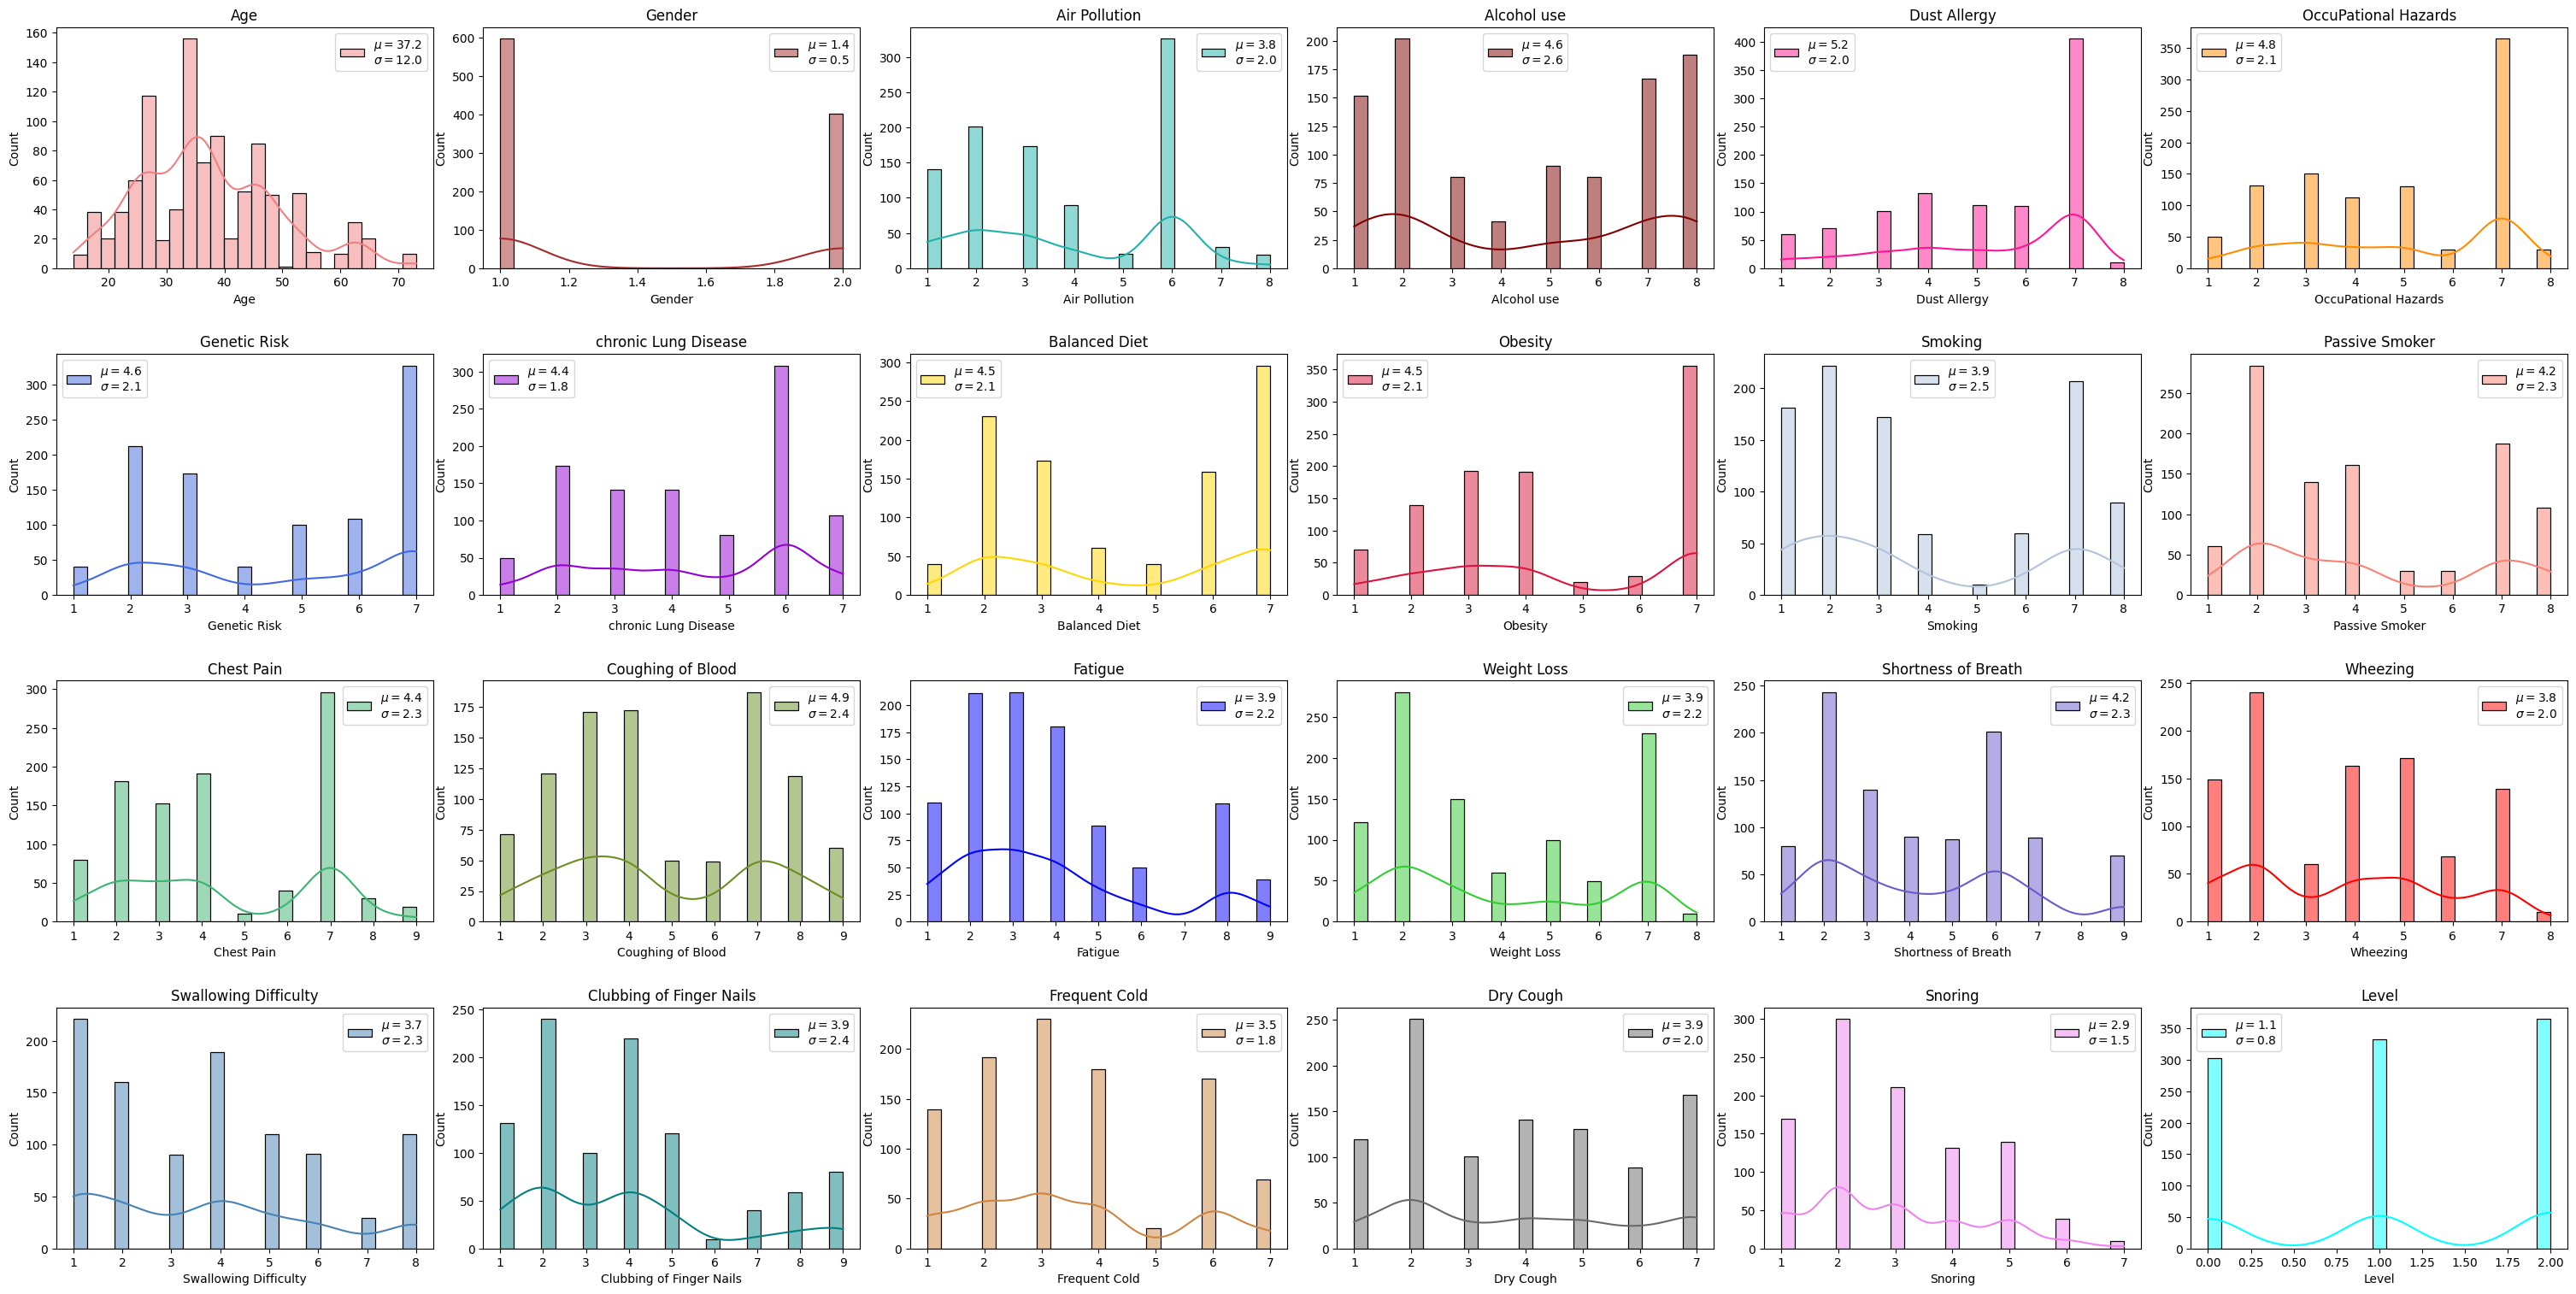

In [19]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(30, 15))
colors = ['lightcoral','brown','lightseagreen','maroon','deeppink','darkorange',
          'royalblue','darkviolet','gold','crimson','lightsteelblue','salmon','mediumseagreen',
          'olivedrab','blue','limegreen','slateblue','red','steelblue','teal','peru','dimgray','violet','cyan']
ax = ax.flatten()
i = 0

for k, v in df_cancer.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 color=colors[i],
                 kde=True,
                 bins=25,
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k}')
    ax[i].legend()
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

###### $Correlated Features$

In [20]:
correlationF=[]
for column in df_cancer.columns :
    for columnF in df_cancer.columns:
        a = df_cancer[column].corr(df_cancer[columnF])
        if abs(a) > 0.8 and (column != columnF) :
            if a in correlationF:
                continue
            else :
                correlationF.append(a)         
                print (column +" column has high correlation with column "+ columnF)
                print(df_cancer[column].corr(df_cancer[columnF]))
                print("\n")

Alcohol use column has high correlation with column Dust Allergy
0.8186435195099202


Alcohol use column has high correlation with column OccuPational Hazards
0.8787859206801724


Alcohol use column has high correlation with column Genetic Risk
0.8772098877053727


Dust Allergy column has high correlation with column Alcohol use
0.8186435195099203


Dust Allergy column has high correlation with column OccuPational Hazards
0.8358597714567221


OccuPational Hazards column has high correlation with column Alcohol use
0.8787859206801725


OccuPational Hazards column has high correlation with column Genetic Risk
0.8930485226784642


OccuPational Hazards column has high correlation with column chronic Lung Disease
0.8582838533909194


Genetic Risk column has high correlation with column Alcohol use
0.8772098877053726


Genetic Risk column has high correlation with column chronic Lung Disease
0.8362308273811654


Genetic Risk column has high correlation with column Chest Pain
0.83175082637368

###### Above calculation shows us that
- Alcohol Use has high correlation with Dust Allergy, Occupational Hazards and Genetic risk
- Occupational Hazards has high correlation with Dust Allergy, Genetic Risk, chronic Lung Disease
- Genetic risk has high correlation with chronic Lung Disease, Chest Pain
- Obesity has high correlation coughing of blood

<AxesSubplot: title={'center': 'Level Column Values'}, ylabel='Level'>

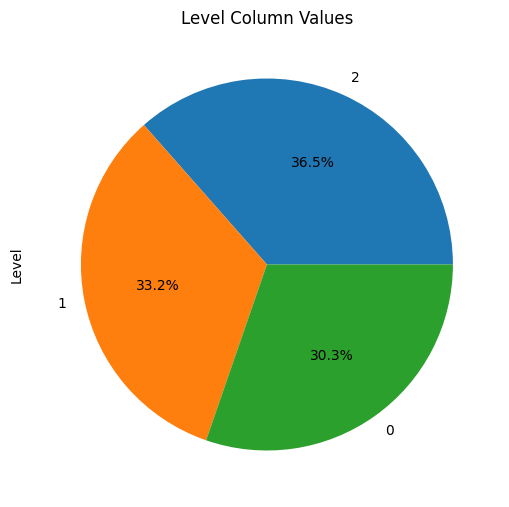

In [21]:
plt.title("Level Column Values")
df_cancer['Level'].value_counts().plot(kind='pie',figsize=(6,7),autopct='%1.1f%%')

- Q: How OccuPational Hazards influence Genetic Risk ? 

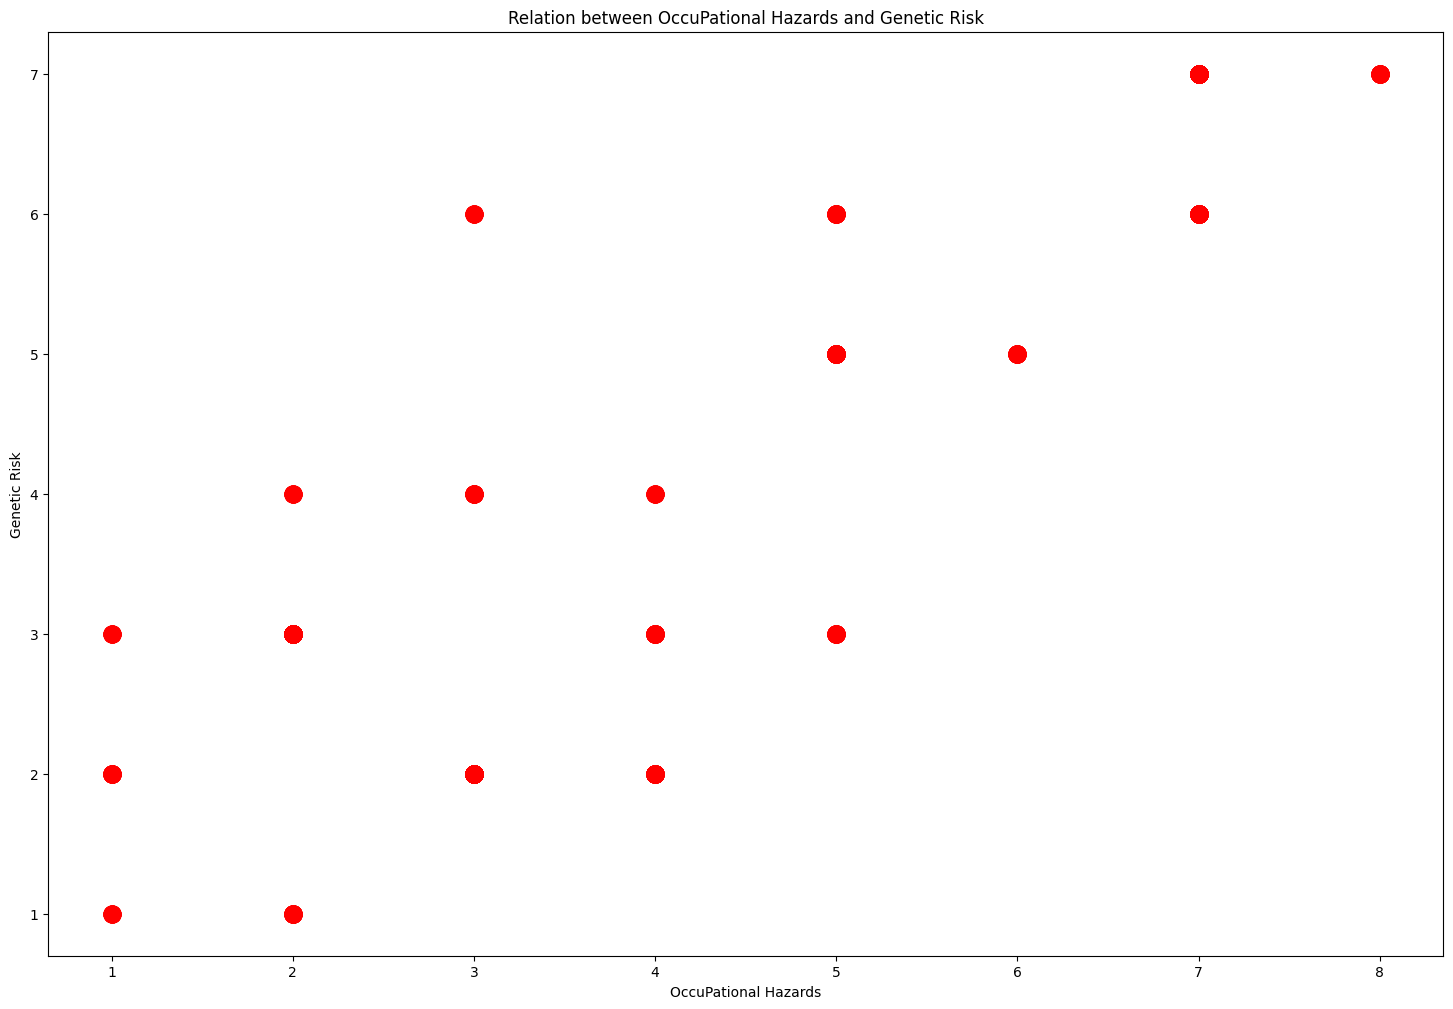

In [22]:
plt.figure(figsize=(18, 12))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Relation between OccuPational Hazards and Genetic Risk")
plt.scatter(df_cancer["OccuPational Hazards"],df_cancer["Genetic Risk"],alpha=0.7,c="red",linewidths=7)

- There's a postive correlation between them as people with high genetic risk are having high occupational hazards

- Q: How OccuPational Hazards influence Dust Allergy ? 

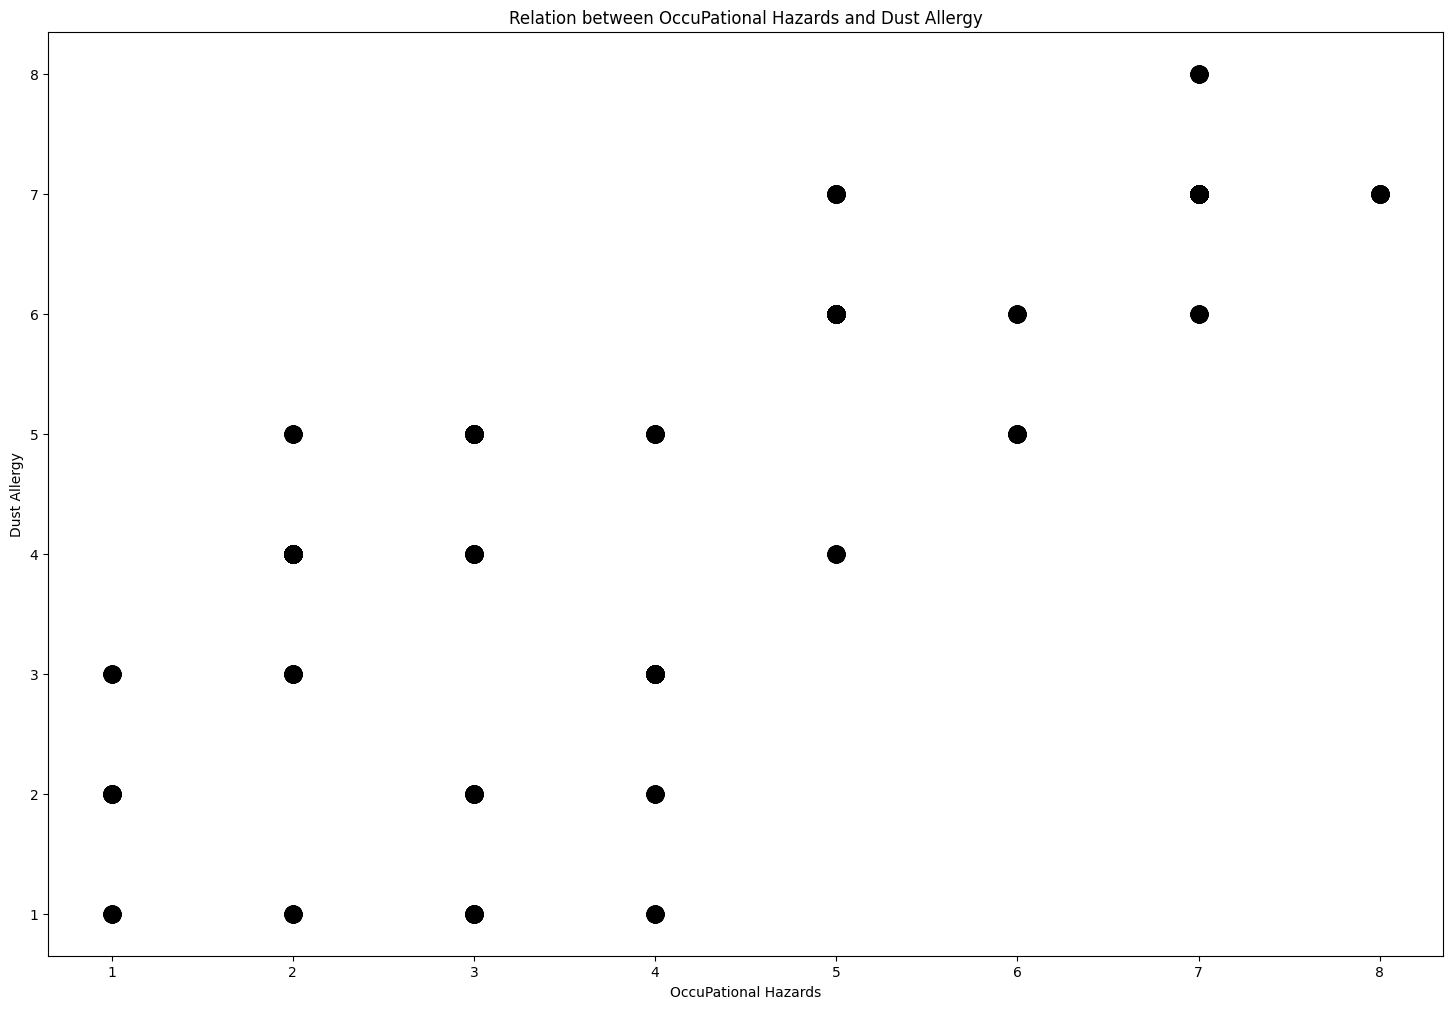

In [23]:
plt.figure(figsize=(18, 12))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Dust Allergy")
plt.title("Relation between OccuPational Hazards and Dust Allergy")
plt.scatter(df_cancer["OccuPational Hazards"],df_cancer["Dust Allergy"],alpha=0.7,c="black",linewidths=7)

- People with occupational hazards tend to have increased chances of Dust Allergy.

-  Q: How OccuPational Hazards influence chronic Lung Disease ?

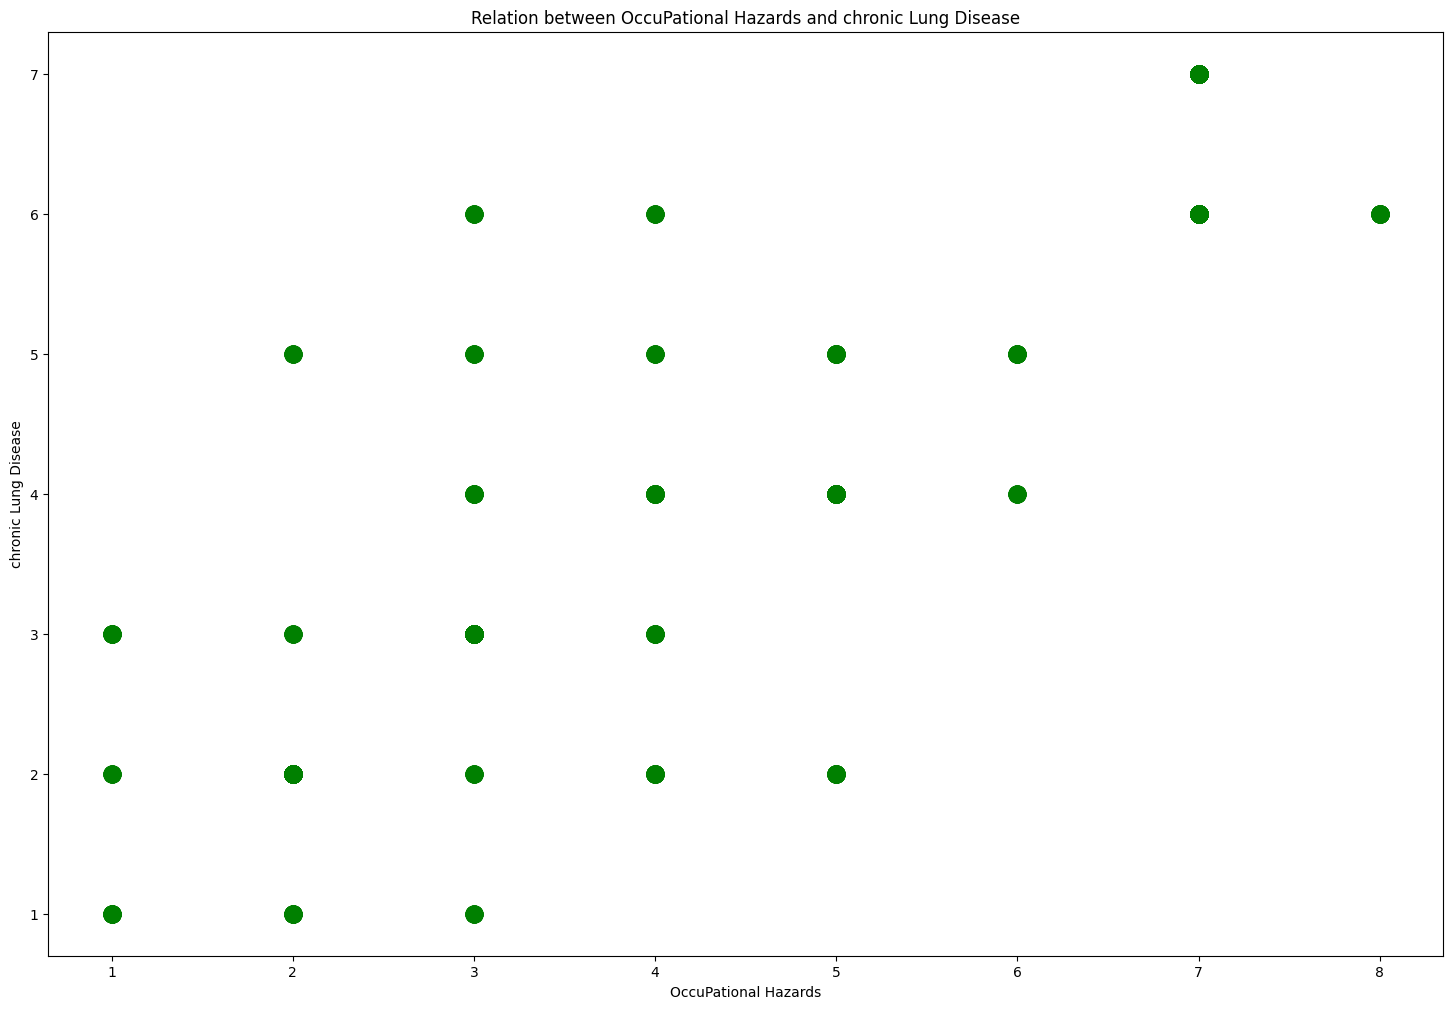

In [24]:
plt.figure(figsize=(18, 12))
plt.xlabel("OccuPational Hazards")
plt.ylabel("chronic Lung Disease")
plt.title("Relation between OccuPational Hazards and chronic Lung Disease")
plt.scatter(df_cancer["OccuPational Hazards"],df_cancer["chronic Lung Disease"],alpha=0.7,c="green",linewidths=7)

- People with high Occupational Hazards tend to have increased risks of chronic lung disease

- Q: What impact does OccuPational Hazards have on Alcohol consumption ?

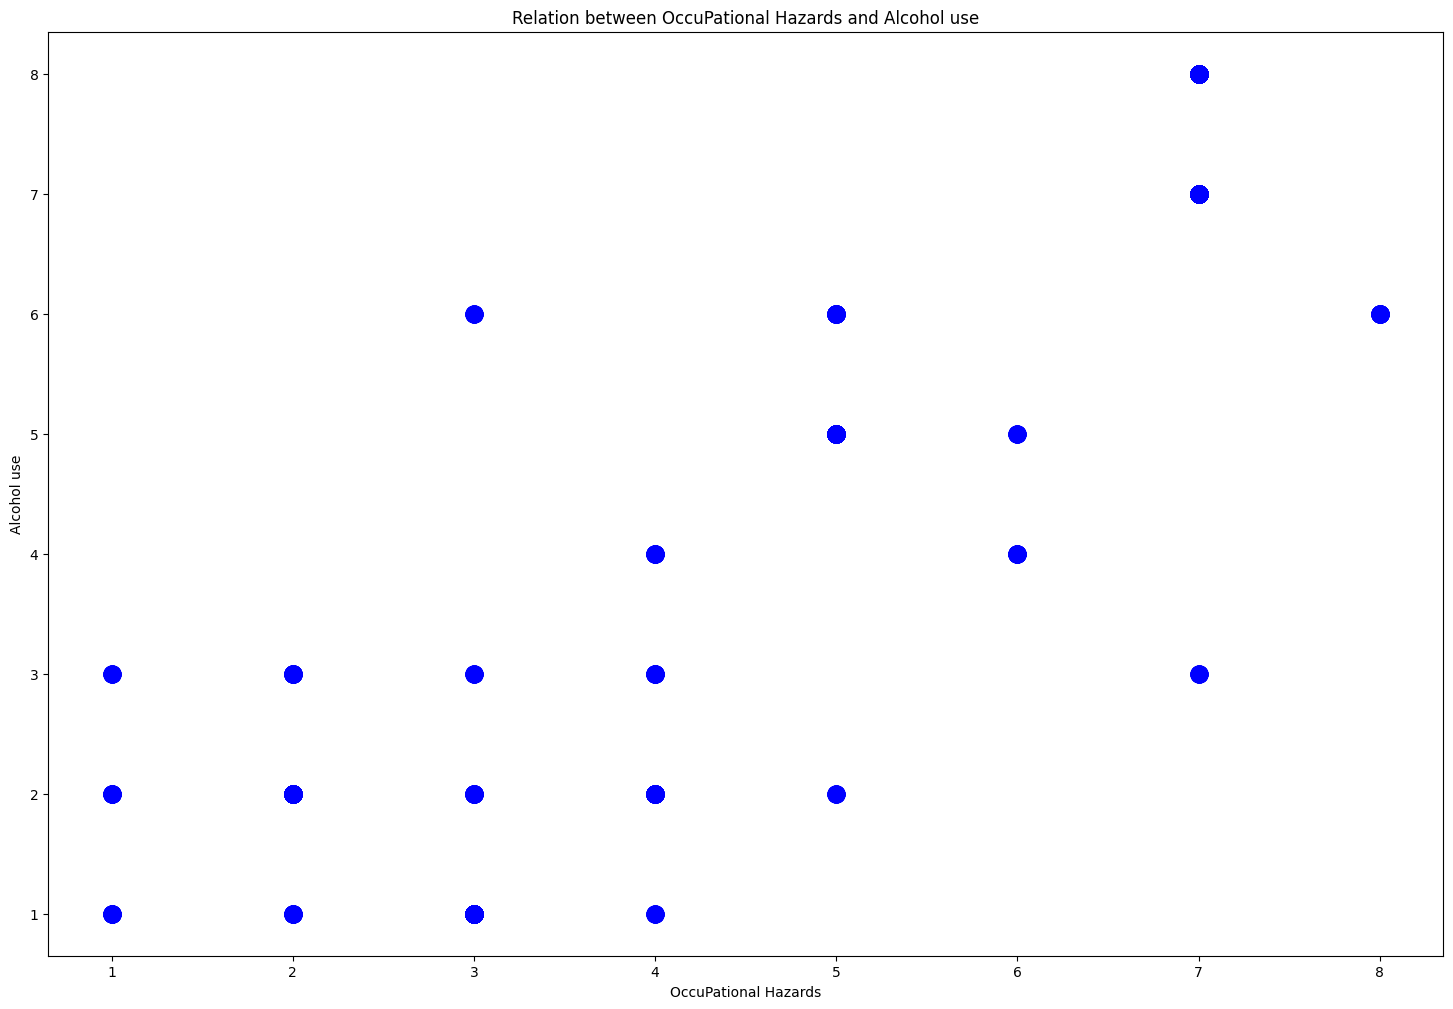

In [25]:
plt.figure(figsize=(18, 12))
plt.xlabel("OccuPational Hazards")
plt.ylabel("Alcohol use")
plt.title("Relation between OccuPational Hazards and Alcohol use")
plt.scatter(df_cancer["OccuPational Hazards"],df_cancer['Alcohol use'],alpha=0.7,c="blue",linewidths=7)

<AxesSubplot: title={'center': 'Relation between Occupational Hazards and Alcohol Use'}, xlabel='OccuPational Hazards', ylabel='Alcohol use'>

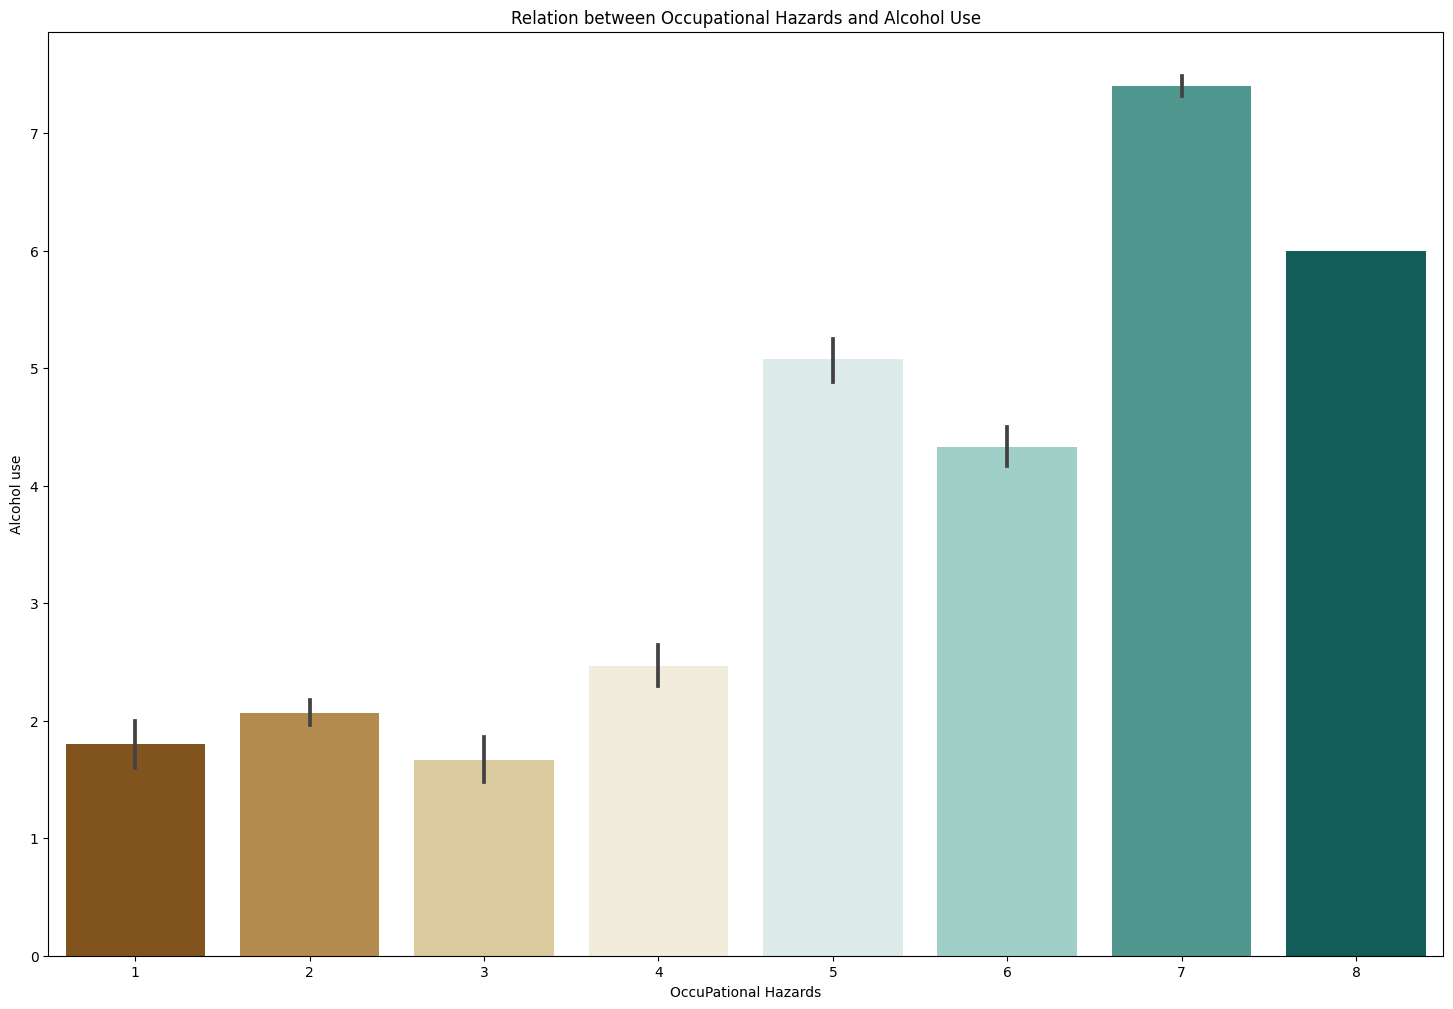

In [26]:
plt.figure(figsize=(18, 12))
plt.title("Relation between Occupational Hazards and Alcohol Use")
sns.barplot(data=df_cancer, x="OccuPational Hazards", y='Alcohol use',palette="BrBG")

- People with High Occupational Hazards tend to consume more Alcohol.

- Q: What is the Relation between Genetic Risk and chronic Lung Disease ?

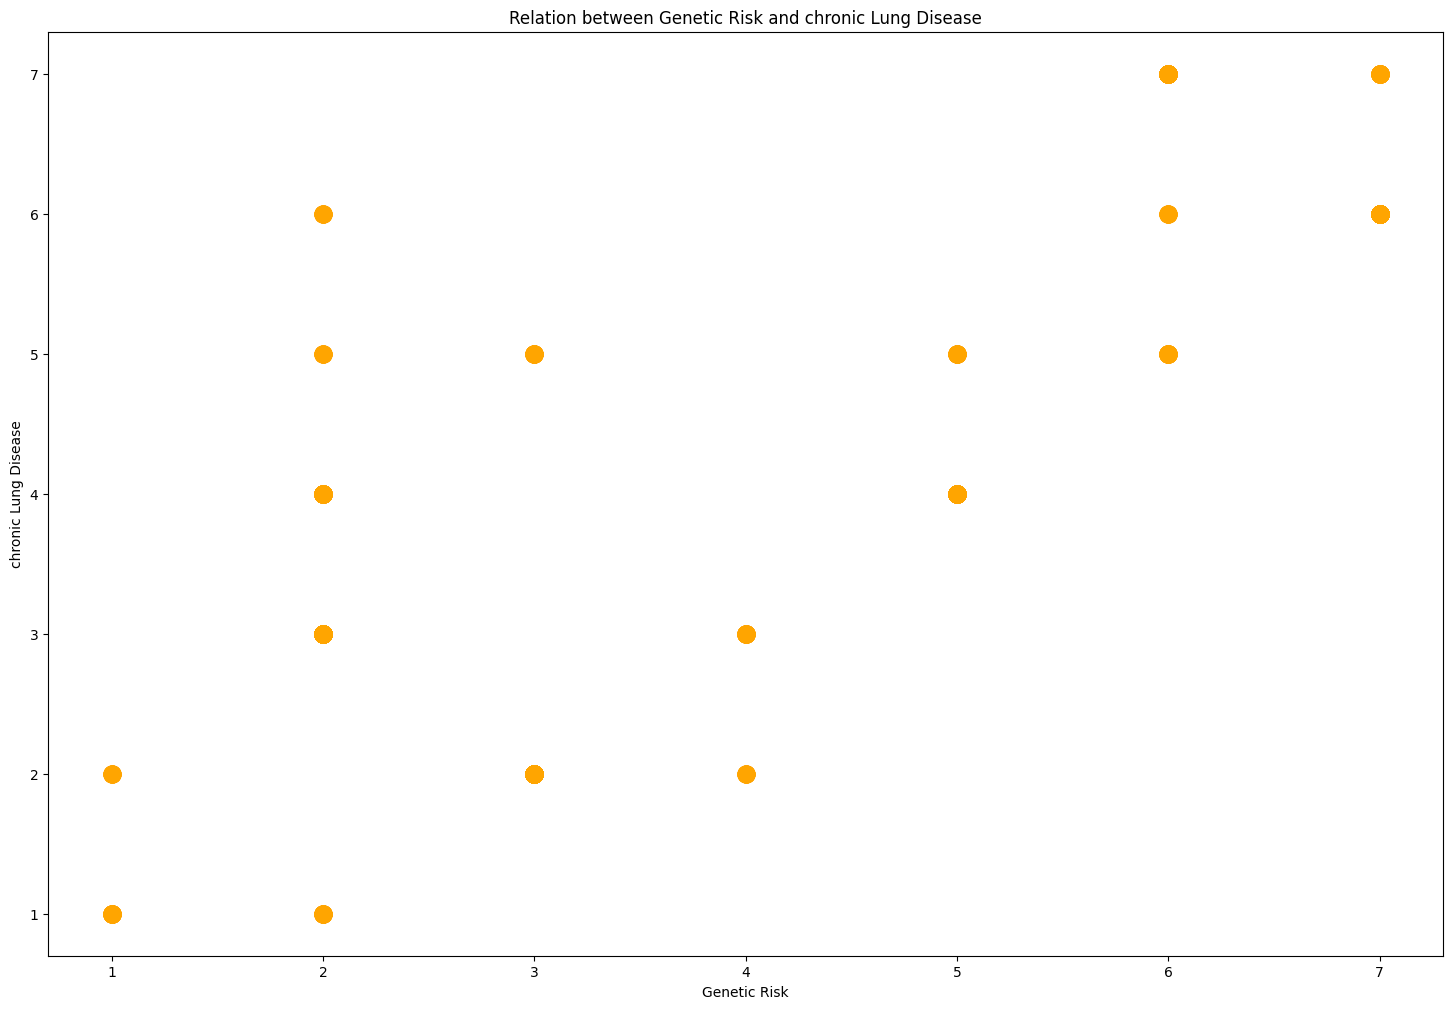

In [27]:
plt.figure(figsize=(18, 12))
plt.xlabel('Genetic Risk')
plt.ylabel('chronic Lung Disease')
plt.title("Relation between Genetic Risk and chronic Lung Disease")
plt.scatter(df_cancer['Genetic Risk'],df_cancer['chronic Lung Disease'],alpha=0.7,c="orange",linewidths=7)

- People with chronic lung disease tend to have more genetic risks

- Q: What is the Relation between Genetic Risk and Chest Pain ?

<AxesSubplot: title={'center': 'Relation between Genetic Risk and Chest Pain'}, xlabel='Genetic Risk', ylabel='Chest Pain'>

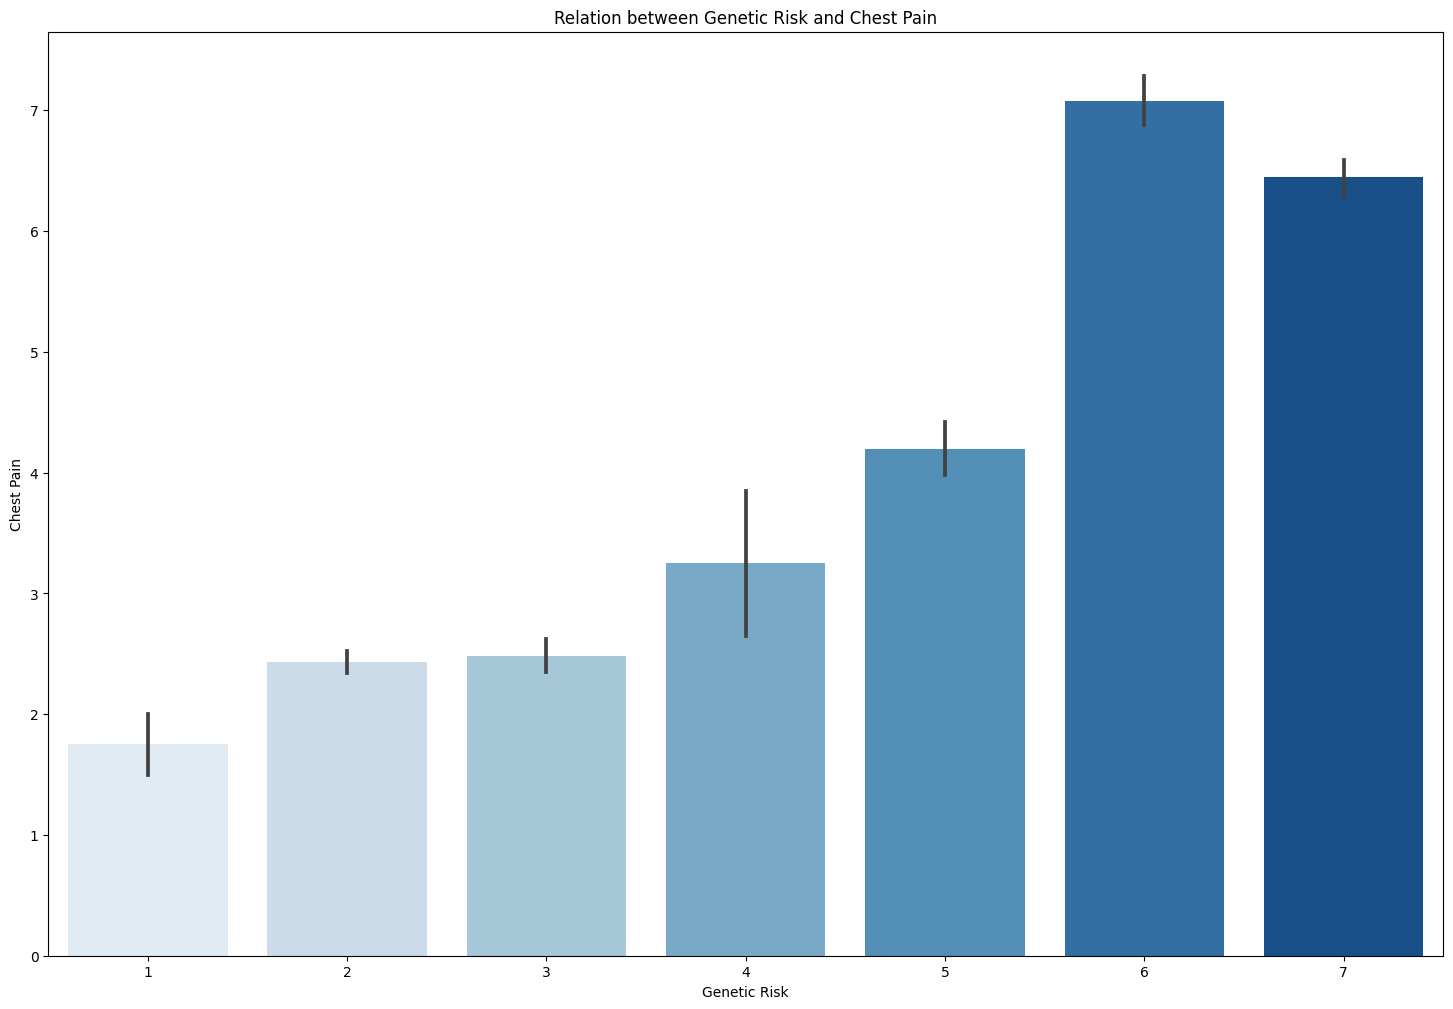

In [28]:
plt.figure(figsize=(18, 12))
plt.title("Relation between Genetic Risk and Chest Pain")
sns.barplot(data=df_cancer, x="Genetic Risk", y="Chest Pain",palette='Blues')

-  People with Chest Pain tend to have more genetic risks

- Q: How Obesity is affecting Coughing of blood level ?

<AxesSubplot: title={'center': 'Relation between Obesity and Coughing of Blood'}, xlabel='Obesity', ylabel='Coughing of Blood'>

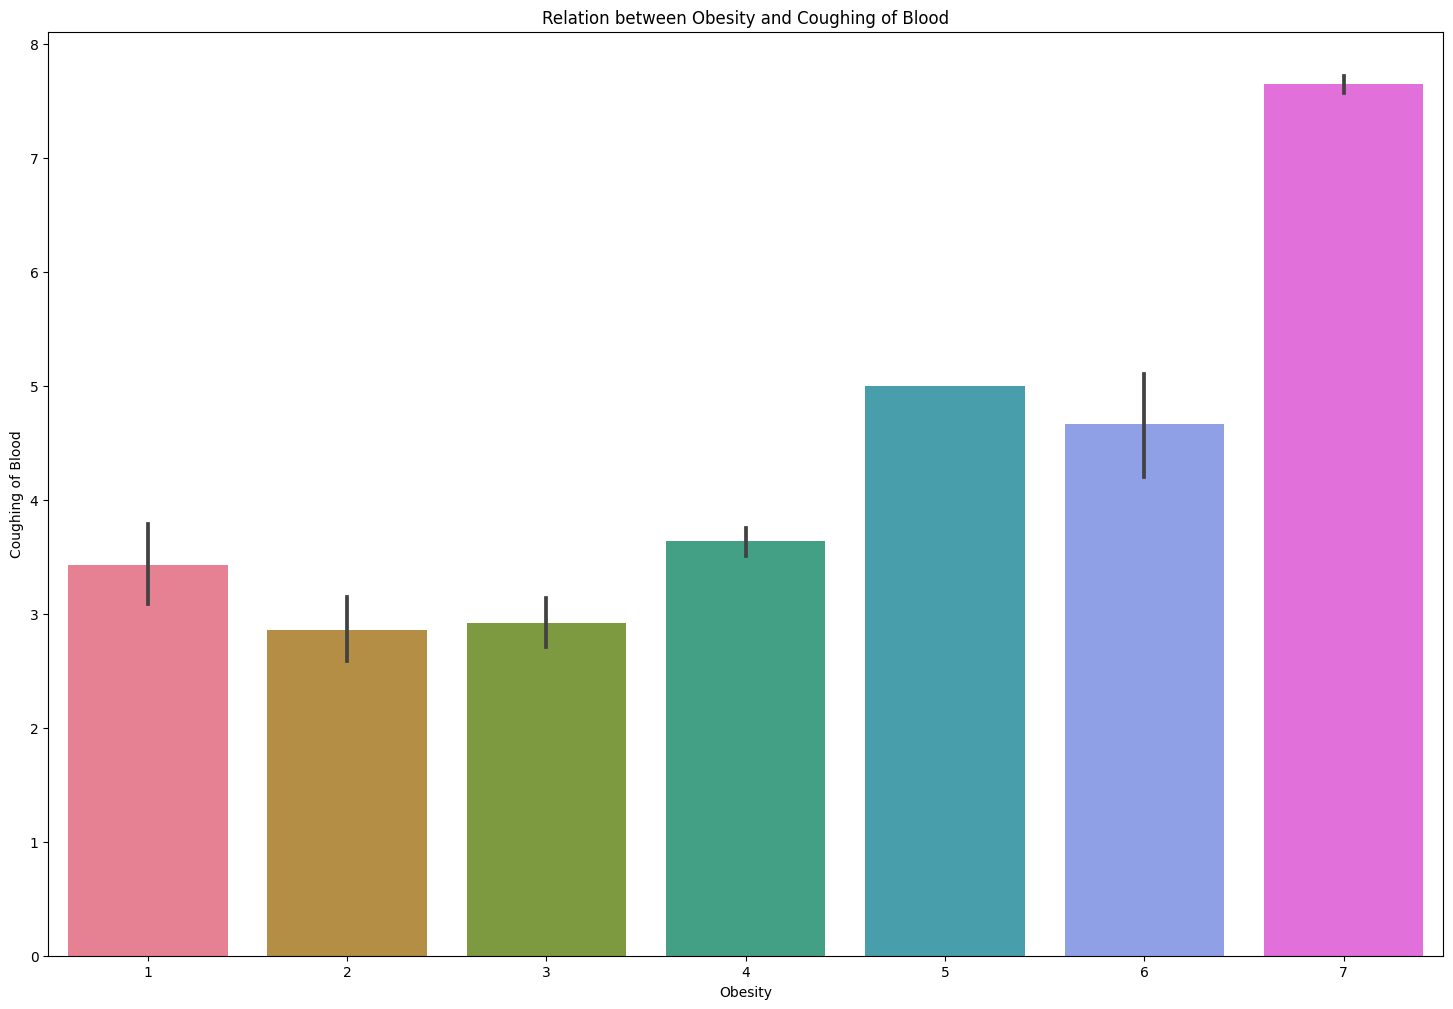

In [29]:
plt.figure(figsize=(18, 12))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df_cancer, x="Obesity", y="Coughing of Blood",palette="husl")

- As expected people with high obesity tends to have more coughing of blood

- Q: How many passive smokers do we have in our data?

<AxesSubplot: title={'center': 'Number of Passive Smokers'}, xlabel='Passive Smoker', ylabel='Count'>

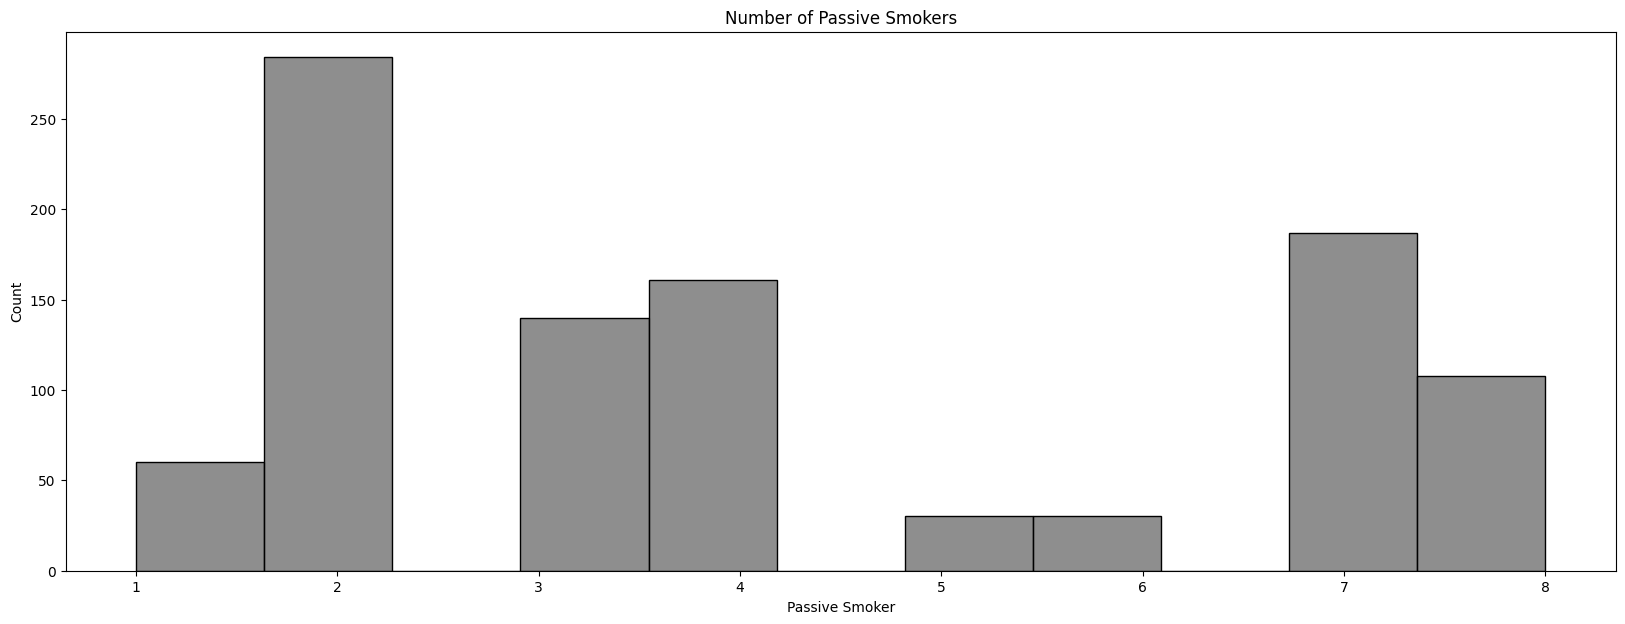

In [30]:
plt.subplots(figsize=(20, 7))
plt.title("Number of Passive Smokers")
sns.histplot(data=df_cancer, x=df_cancer["Passive Smoker"],color= "dimgray")

- Most Passive Smokers are Smoking in low values.

- Q: Who is drinking the most alcohols ?

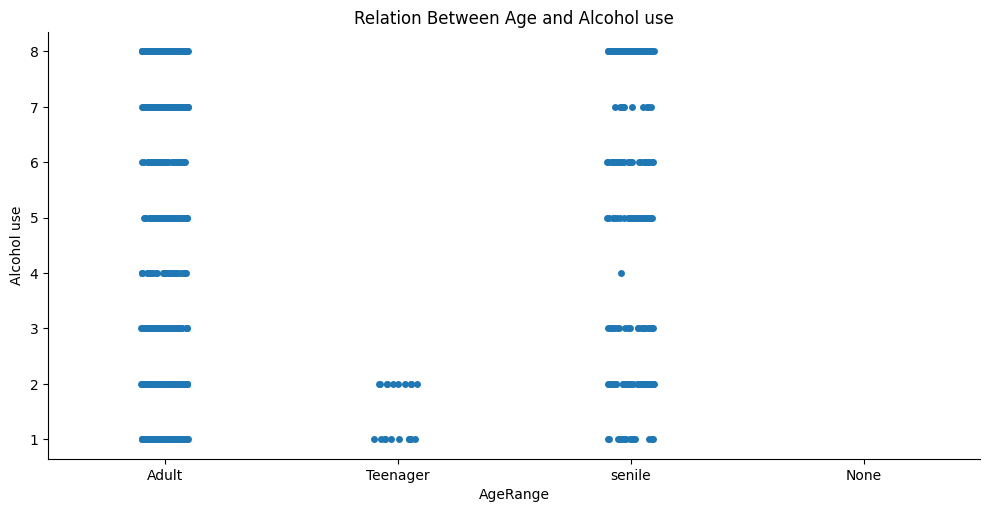

In [31]:
dfcopy= df_cancer.copy()

dfcopy['AgeRange'] = None
dfcopy.loc[(dfcopy['Age'] > 14) & (dfcopy["Age"] < 18), 'AgeRange'] = "Teenager"
dfcopy.loc[(dfcopy['Age'] > 18) & (dfcopy["Age"] < 45), 'AgeRange'] = "Adult"
dfcopy.loc[(dfcopy['Age'] > 45) & (dfcopy["Age"] < 74), 'AgeRange'] = "senile"

sns.catplot(data=dfcopy, x="AgeRange", y="Alcohol use",aspect=20/10,height=5).set(title='Relation Between Age and Alcohol use')

- Adults are the most people to drink alcohols ( 18 < Adults < 45 )

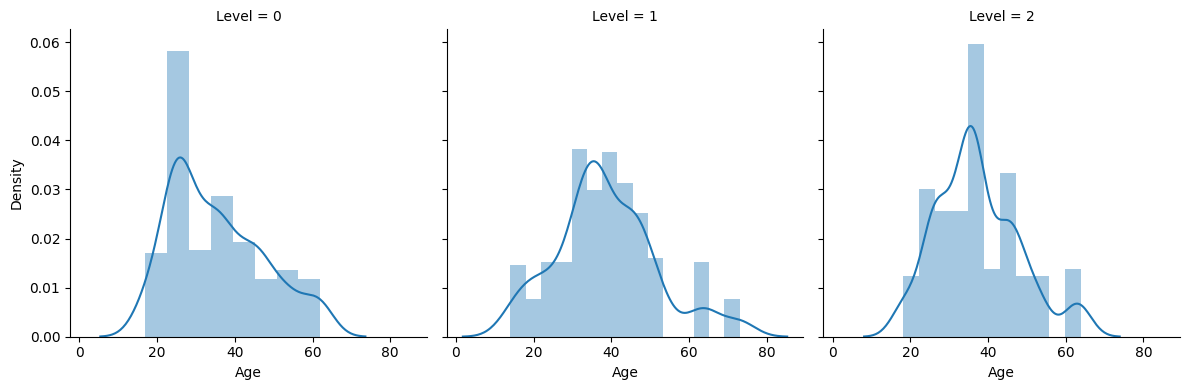

In [32]:
sea = sns.FacetGrid(df_cancer, col = "Level", height = 4)
sea.map(sns.distplot, "Age")

- Q: What is the Relation between Obesity and Level of lung cancer ?

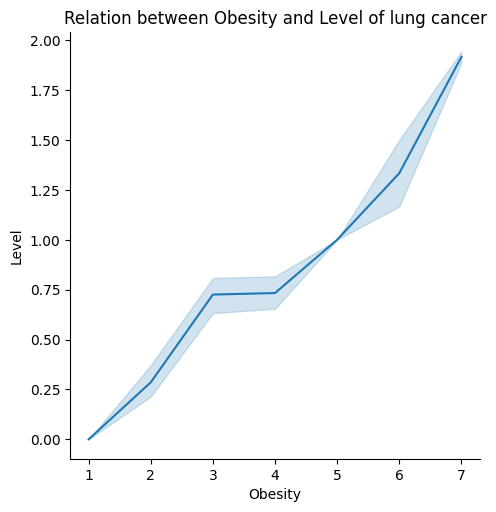

In [33]:
sns.relplot(data=df_cancer, x="Obesity", y="Level", kind="line")
plt.title("Relation between Obesity and Level of lung cancer")
plt.show()

- Obesity and the Level of lung cancer are Highly correlated to each other.

- Q: How Air Pollution is affecting lung cancer level?

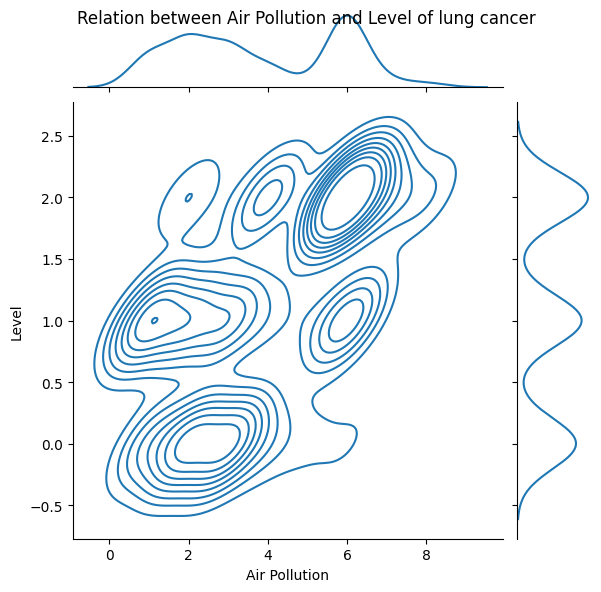

In [34]:
sns.jointplot(data=df_cancer, x='Air Pollution', y='Level', kind="kde")
plt.suptitle("Relation between Air Pollution and Level of lung cancer")
plt.show()

- From above plot we can see that Air pollution is moderately correlated with the Level of lung cancer

- Q: How Coughing of blood is affecting lung cancer level?

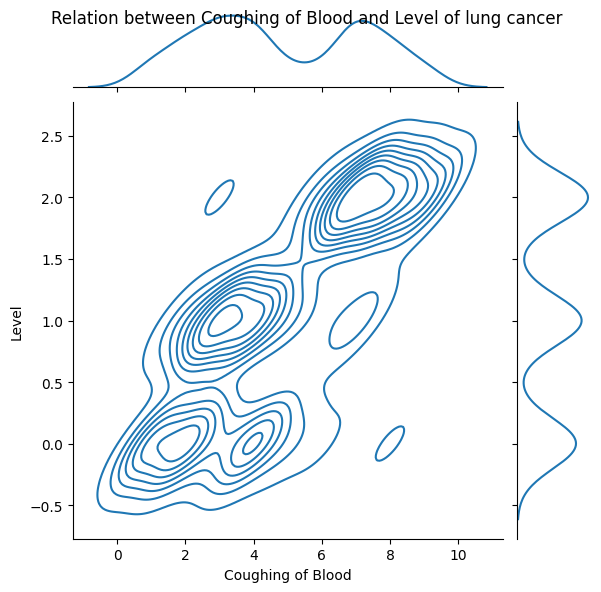

In [35]:
sns.jointplot(data=df_cancer, x='Coughing of Blood', y='Level', kind="kde")
plt.suptitle("Relation between Coughing of Blood and Level of lung cancer")
plt.show()

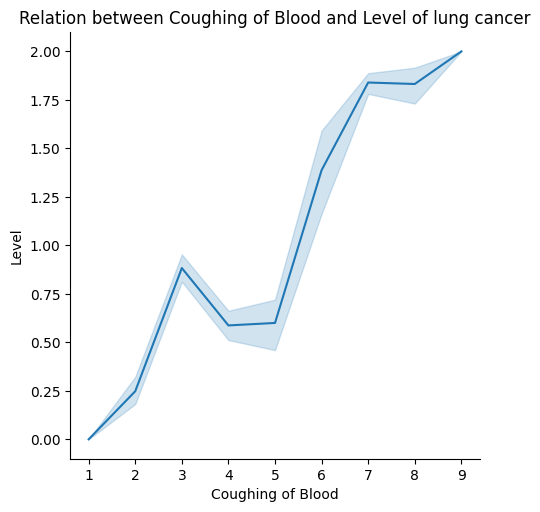

In [36]:
sns.relplot(data=df_cancer, x="Coughing of Blood", y="Level", kind="line")
plt.title("Relation between Coughing of Blood and Level of lung cancer")
plt.show()

- People with increased risk of lung cancer tend to cough blood more often.

- Q: How Passive Smoking is affecting lung cancer level?

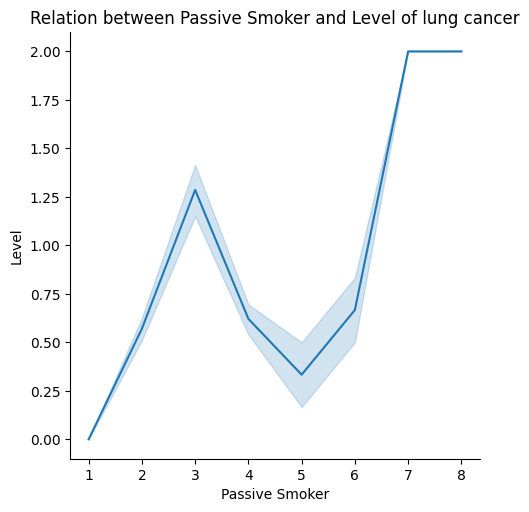

In [37]:
sns.relplot(data=df_cancer, x="Passive Smoker", y="Level",kind='line')
plt.title("Relation between Passive Smoker and Level of lung cancer")
plt.show()

- As expected, Passive smokers have good amount of tendency of getting affected with lung cancer.

- Q: How Alcohol Use is affecting lung cancer level?

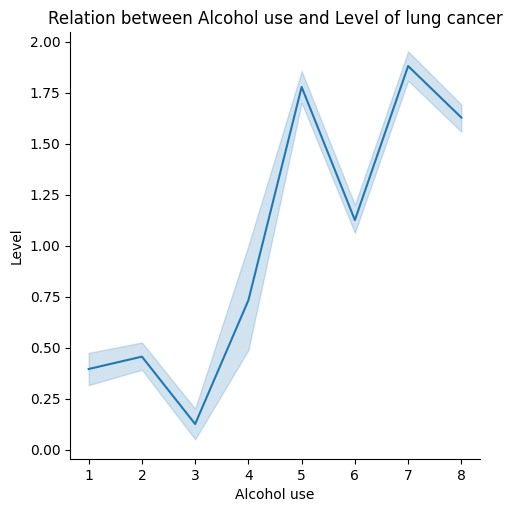

In [38]:
sns.relplot(data=df_cancer, x="Alcohol use", y="Level",kind='line')
plt.title("Relation between Alcohol use and Level of lung cancer")
plt.show()

- Q: How Dust allergy is affecting lung cancer level?

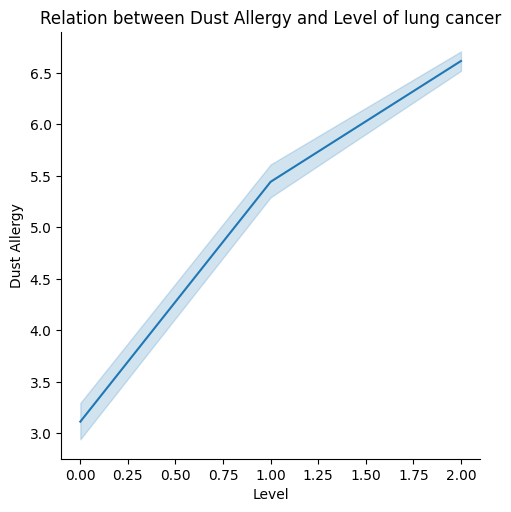

In [39]:
sns.relplot(
    data=df_cancer, kind="line",
    y="Dust Allergy", x="Level")
plt.title("Relation between Dust Allergy and Level of lung cancer")
plt.show()


## $Train Test Split$  $and$  $Model Fitting$

- Split data between predictors and output variable

In [40]:
x = df_cancer.drop(["Level"],axis=1).values
y = df_cancer.Level.values

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [42]:
x_train

array([[44,  1,  2, ...,  3,  2,  3],
       [18,  2,  3, ...,  1,  4,  1],
       [38,  2,  1, ...,  4,  2,  5],
       ...,
       [24,  1,  6, ...,  1,  7,  6],
       [45,  2,  1, ...,  2,  3,  1],
       [28,  1,  6, ...,  1,  2,  1]], dtype=int64)

In [43]:
x_test

array([[45,  2,  1, ...,  4,  2,  5],
       [26,  1,  2, ...,  2,  3,  4],
       [35,  2,  4, ...,  2,  4,  1],
       ...,
       [61,  2,  2, ...,  2,  1,  2],
       [27,  2,  3, ...,  2,  6,  2],
       [17,  1,  3, ...,  1,  7,  2]], dtype=int64)

### $Decision Tree$

##### Function of Measure Performance

In [44]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=plt.cm.Blues, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Decision Tree Model')
    plt.show()

In [45]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred_train_DT = model_DT.predict(x_train)

In [47]:
y_pred_DT = model_DT.predict(x_test)

##### Confusion Matrix of Decision Tree Classifier Model Outcome 

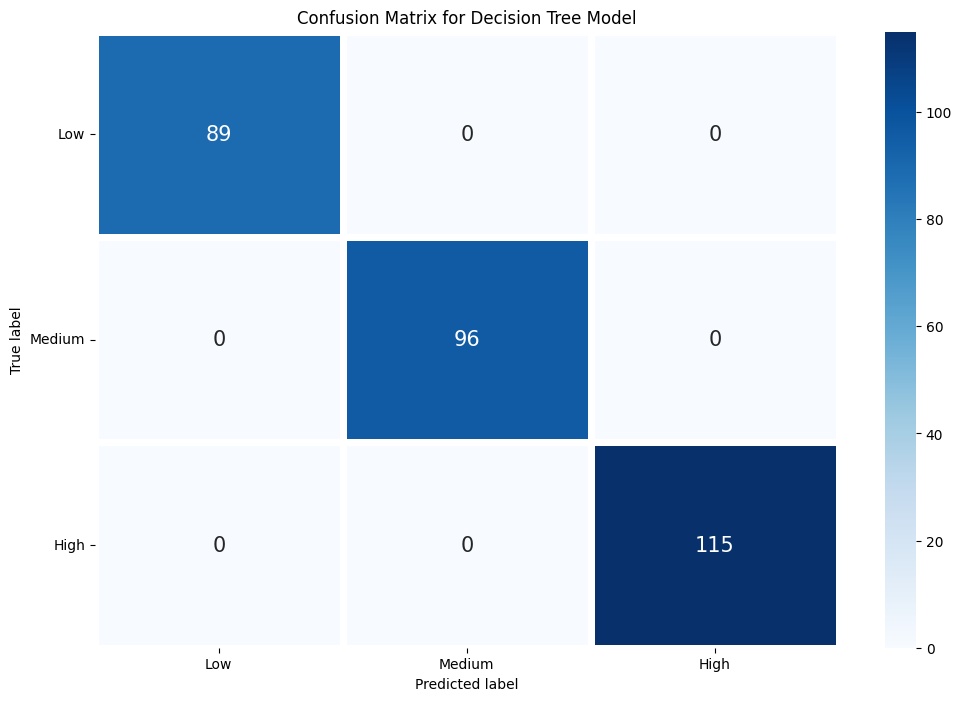

In [48]:
CM(y_test, y_pred_DT, col_names=['Low', 'Medium', 'High'])

##### Classification Report of Decision Tree Classifier Model

In [49]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [50]:
data=pd.DataFrame({'y_Test  ':y_test,'y_pred_DT ':y_pred_DT})
data[:20]

,y_Test,y_pred_DT
0,1,1
1,0,0
2,1,1
3,0,0
4,2,2
5,0,0
6,0,0
7,0,0
8,2,2
9,0,0


In [51]:
#Training Recall
recall_DT_training = recall_score(y_train, y_pred_train_DT, average = 'micro')
recall_DT_training

1.0

In [52]:
#Testing Recall
recall_DT = recall_score(y_test, y_pred_DT, average = 'micro')
recall_DT

1.0

##### Decision Tree Classifier Plot 

In [53]:
feature_names = df_cancer.columns[0:23]
viz = df_cancer.copy()
viz["Level"]=viz["Level"].values.astype(str)
print(viz.dtypes)
target_names = viz['Level'].unique().tolist()

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


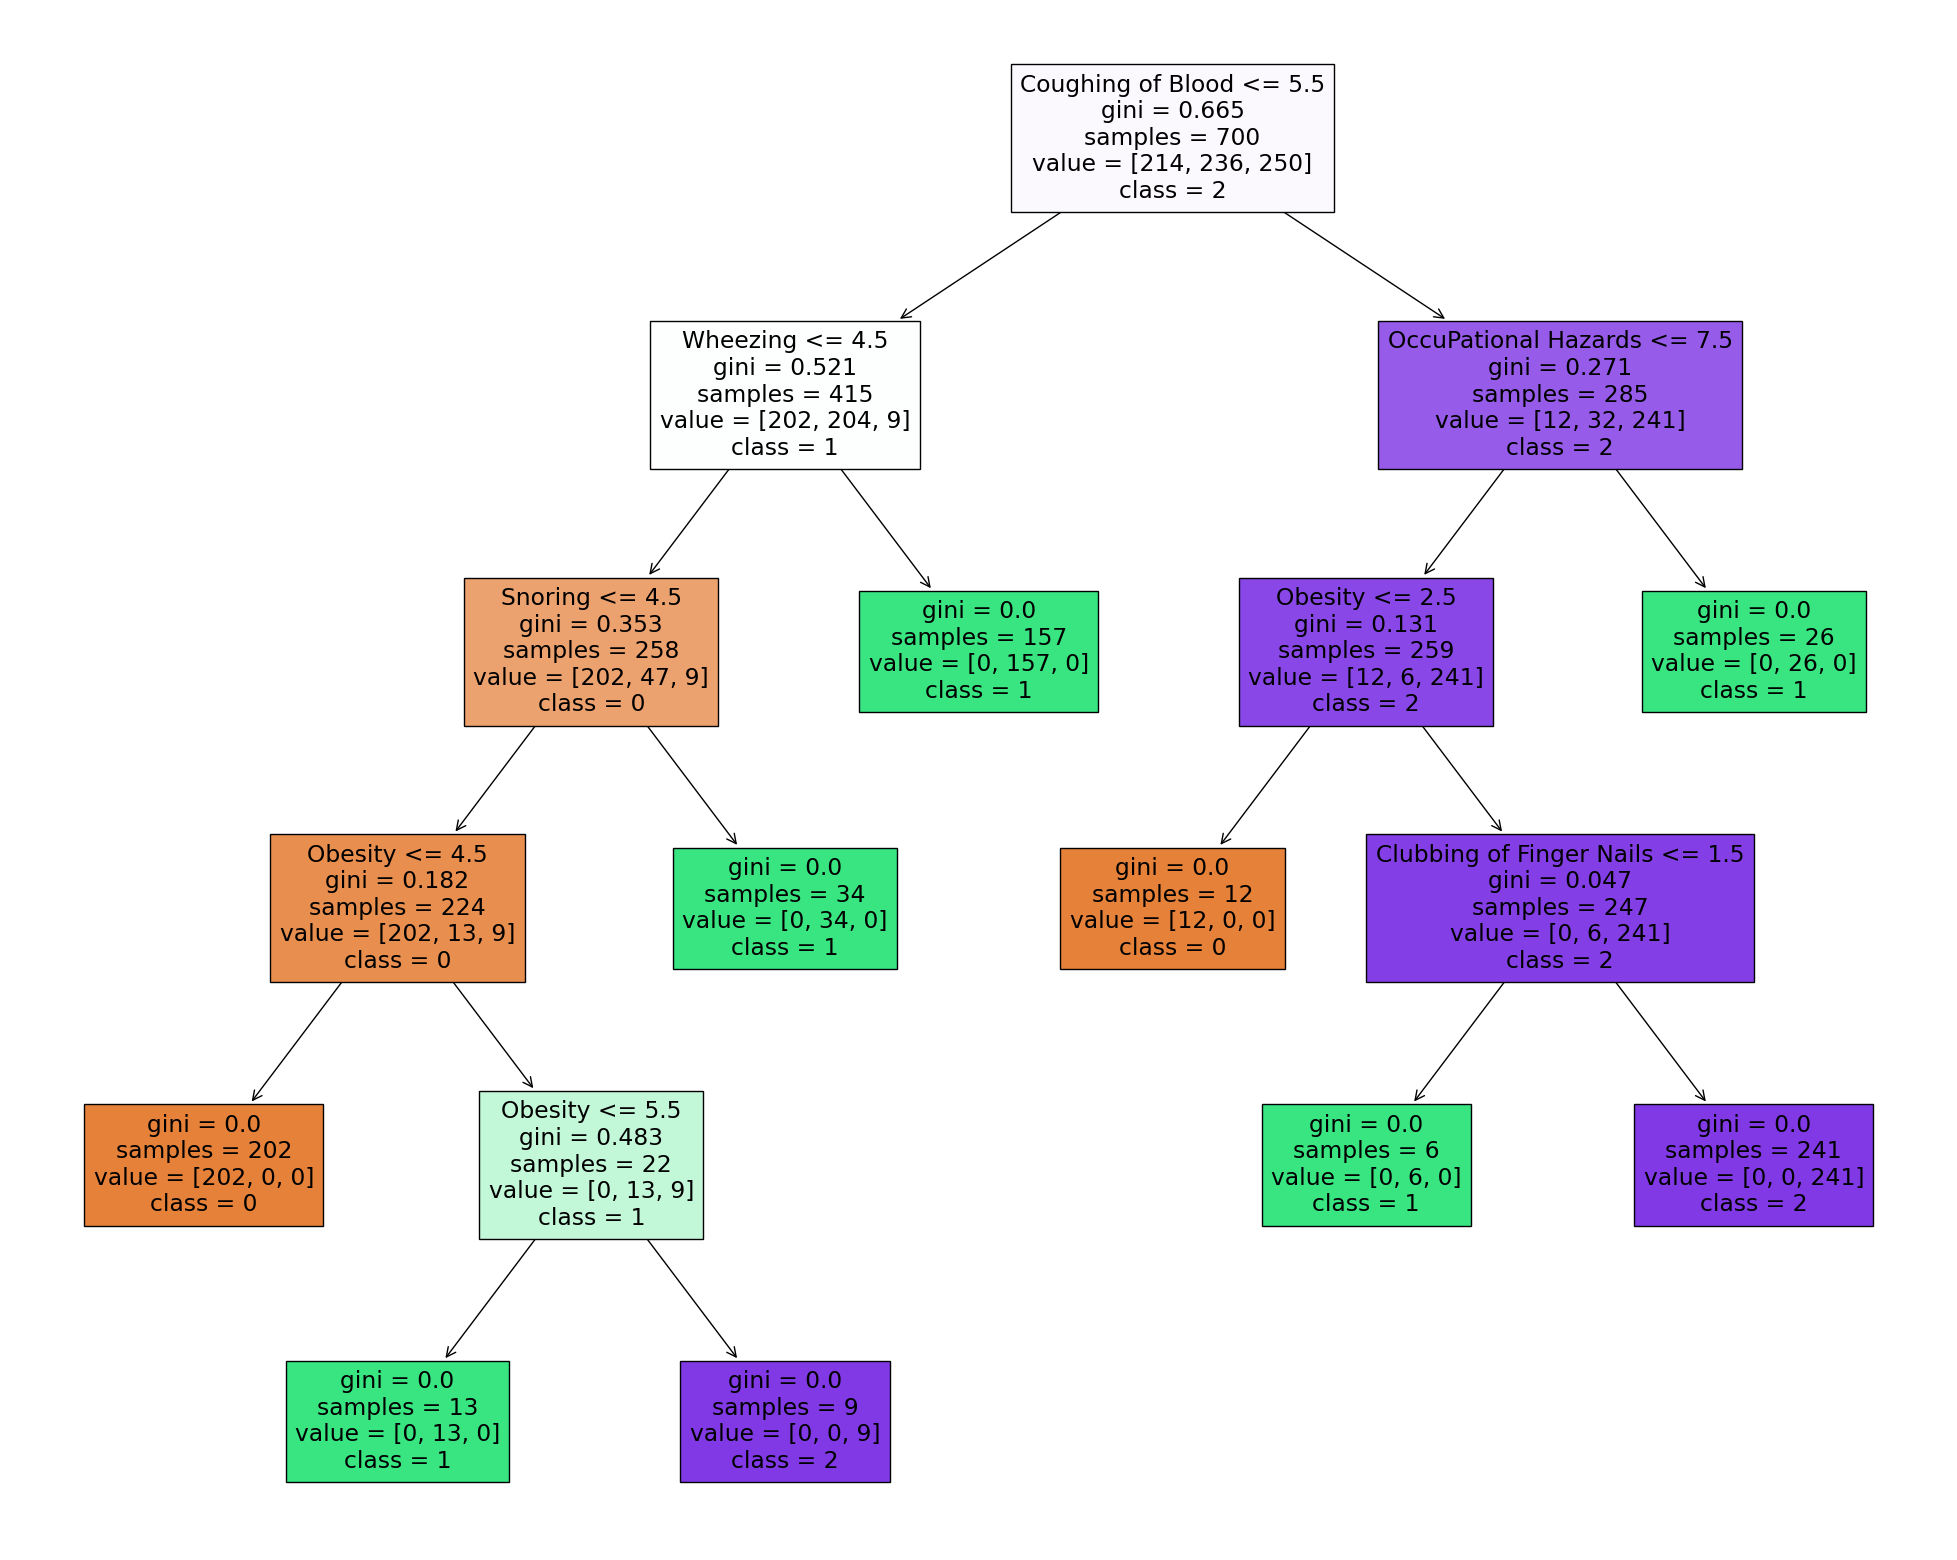

In [54]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(model_DT, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

## $KNN$

##### Function of Measure Performance

In [55]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=plt.cm.Blues, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for K Nearest Neighbours Model')
    plt.show()

In [56]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [57]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
y_pred_train_KNN=KNN.predict(x_train)

In [59]:
y_pred_KNN=KNN.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred_KNN ':y_pred_KNN})
data[:20]

,y_Test,y_pred_KNN
0,1,1
1,0,0
2,1,1
3,0,0
4,2,2
5,0,0
6,0,0
7,0,0
8,2,2
9,0,0


##### Confusion Matrix of K Nearest Neighbours Classifier Model Outcome 

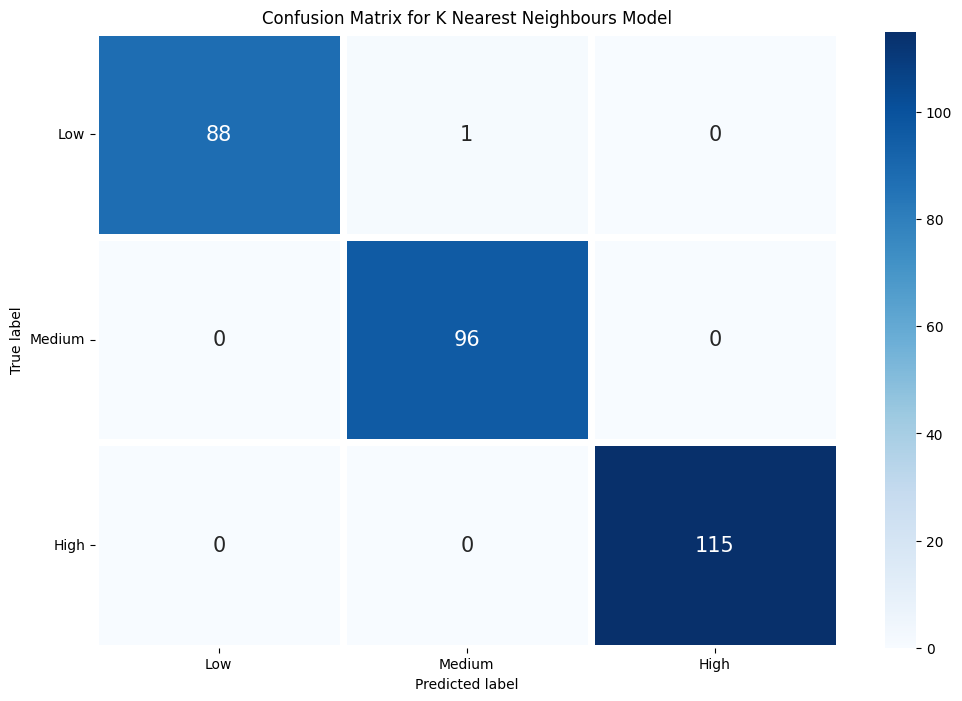

In [60]:
CM(y_test, y_pred_KNN, col_names=['Low', 'Medium', 'High'])

##### Classification Report of K Nearest Neighbours Classifier Model

In [61]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.99      1.00      0.99        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [62]:
#Training Recall
recall_KNN_train=recall_score(y_train, y_pred_train_KNN, average = 'micro')
recall_KNN_train

0.9985714285714286

In [63]:
# Testing Recall
recall_KNN=recall_score(y_test, y_pred_KNN, average = 'micro')
recall_KNN

0.9966666666666667

## $ Logistic Regression$

##### $VarianceInflationFactor$

In [64]:
x1= df_cancer.iloc[:, 0:23]
x1['adding an intercept']=1
x1

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,adding an intercept
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,1
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,1
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1


In [65]:
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns

In [66]:
vif_data["VIF"] = [variance_inflation_factor(x1.values, i)
                          for i in range(len(x1.columns))]

print(vif_data)

                     feature        VIF
0                        Age   1.238571
1                     Gender   1.279021
2              Air Pollution   4.339483
3                Alcohol use  17.593504
4               Dust Allergy   6.547922
5       OccuPational Hazards  21.043507
6               Genetic Risk  20.146458
7       chronic Lung Disease   8.770303
8              Balanced Diet   7.156998
9                    Obesity   7.967699
10                   Smoking   4.926056
11            Passive Smoker   7.879301
12                Chest Pain   8.396442
13         Coughing of Blood   8.265389
14                   Fatigue   3.785934
15               Weight Loss   3.761823
16       Shortness of Breath   4.794475
17                  Wheezing   2.545996
18     Swallowing Difficulty   3.227649
19  Clubbing of Finger Nails   2.921871
20             Frequent Cold   2.492983
21                 Dry Cough   2.264344
22                   Snoring   2.264555
23       adding an intercept  69.589090


In [67]:
df_cancer.drop(columns=['Alcohol use','OccuPational Hazards','Genetic Risk','Balanced Diet','Obesity'], axis=1, inplace=True)
df_cancer

,Age,Gender,Air Pollution,Dust Allergy,chronic Lung Disease,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,5,2,3,2,2,4,3,4,2,2,3,1,2,3,4,0
1,17,1,3,5,2,2,4,2,3,1,3,7,8,6,2,1,7,2,1
2,35,1,4,6,4,2,3,4,8,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2
4,46,1,6,7,6,8,7,7,9,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,6,7,8,7,7,5,3,2,7,8,2,4,5,3,2
996,37,2,6,7,6,7,8,7,7,9,6,5,7,2,4,3,1,4,2
997,25,2,4,6,4,2,3,4,8,8,7,9,2,1,4,6,7,2,2
998,18,2,6,7,6,8,7,7,9,3,2,4,1,4,2,4,2,3,2


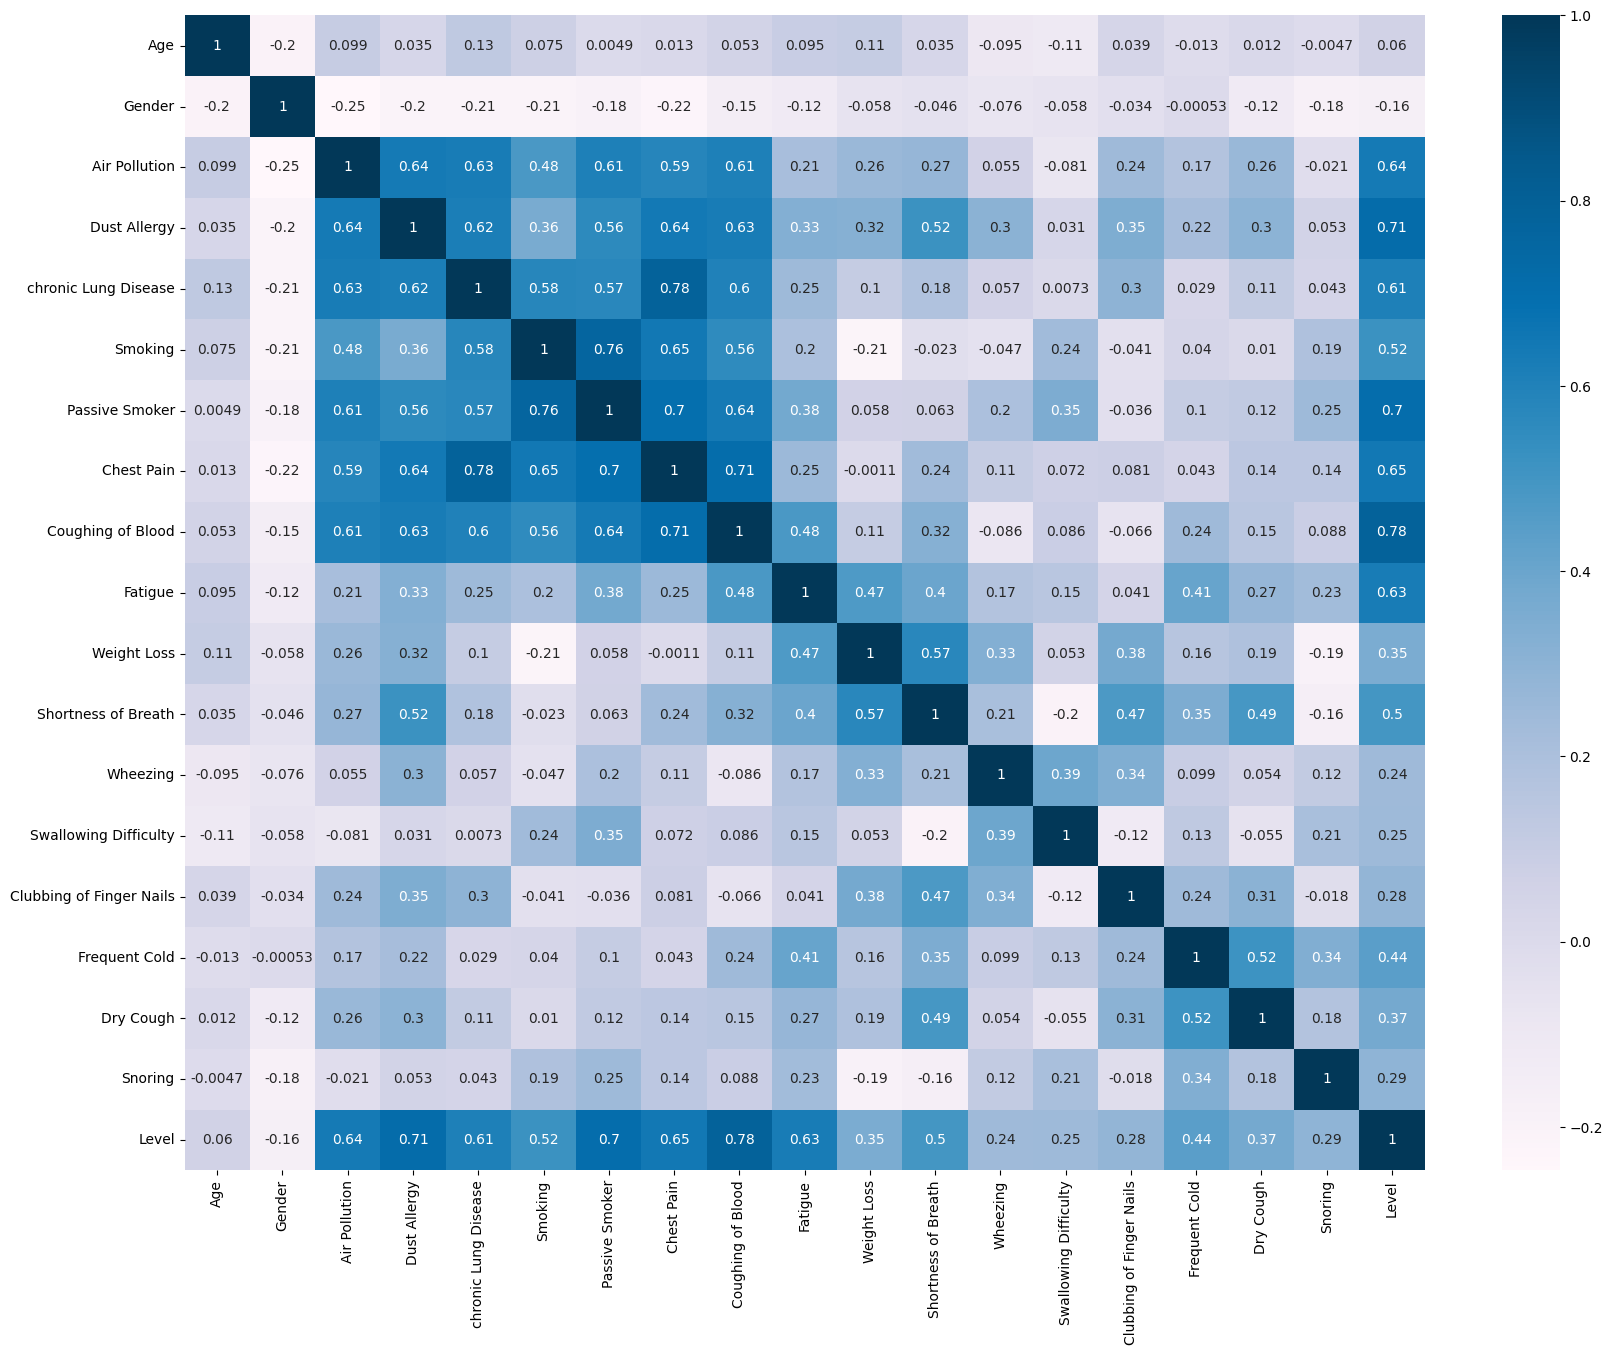

In [68]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

In [69]:
x_L = df_cancer.iloc[:, 0:18]
x_L

,Age,Gender,Air Pollution,Dust Allergy,chronic Lung Disease,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,5,2,3,2,2,4,3,4,2,2,3,1,2,3,4
1,17,1,3,5,2,2,4,2,3,1,3,7,8,6,2,1,7,2
2,35,1,4,6,4,2,3,4,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
4,46,1,6,7,6,8,7,7,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,6,7,8,7,7,5,3,2,7,8,2,4,5,3
996,37,2,6,7,6,7,8,7,7,9,6,5,7,2,4,3,1,4
997,25,2,4,6,4,2,3,4,8,8,7,9,2,1,4,6,7,2
998,18,2,6,7,6,8,7,7,9,3,2,4,1,4,2,4,2,3


In [70]:
x_L = x_L.values
x_L

array([[33,  1,  2, ...,  2,  3,  4],
       [17,  1,  3, ...,  1,  7,  2],
       [35,  1,  4, ...,  6,  7,  2],
       ...,
       [25,  2,  4, ...,  6,  7,  2],
       [18,  2,  6, ...,  4,  2,  3],
       [47,  1,  6, ...,  6,  7,  2]], dtype=int64)

In [71]:
df_cancer['Level'].unique()

array([0, 1, 2], dtype=int64)

In [72]:
df_cancer['Level'].value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

In [73]:
y_L = df_cancer.Level.values
y_L

array([0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [74]:
x_L_train, x_L_test, y_L_train, y_L_test = train_test_split(x_L, y_L, test_size=0.3, random_state=2)

In [75]:
y_L_test.shape

(300,)

In [76]:
model_LR = LogisticRegression()
model_LR.fit(x_L_train, y_L_train)

LogisticRegression()

In [77]:
y_pred_LR_train=model_LR.predict(x_L_train)

In [78]:
y_pred_LR = model_LR.predict(x_L_test)

In [79]:
data=pd.DataFrame({'y_L_Test  ':y_L_test,'y_pred_LR  ':y_pred_LR})
data[:20]

,y_L_Test,y_pred_LR
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,2,2
6,1,1
7,1,1
8,2,2
9,0,0


In [80]:
pd.Series(y_pred_LR).value_counts()

2    111
1     98
0     91
dtype: int64

##### Function of Measure Performance

In [81]:
from sklearn import metrics

In [82]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=plt.cm.Blues, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')

    plt.ylabel('True label')
    plt.title('Confusion Matrix for Logistic Regression Model')
    plt.show()

##### Confusion Matrix of Logiistic Regression Model Outcome 

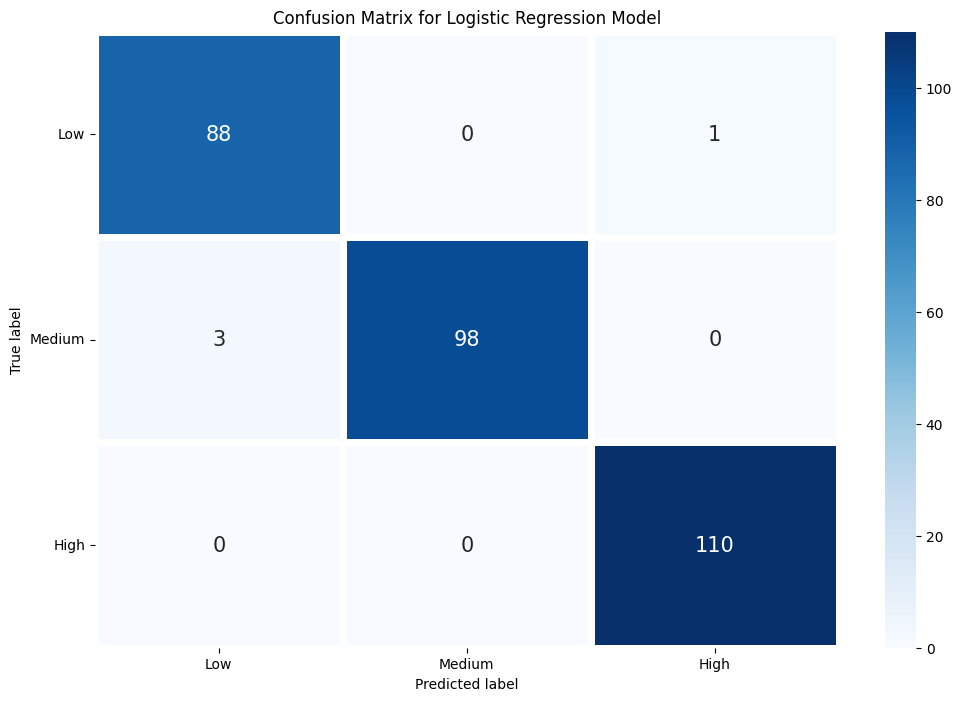

In [83]:
CM(y_L_test, y_pred_LR, col_names=['Low', 'Medium', 'High'])

In [84]:
recall_train =recall_score(y_L_train, y_pred_LR_train, average = 'micro')
recall_train

0.9771428571428571

In [85]:
recall= recall_score(y_L_test, y_pred_LR, average = 'micro')
recall

0.9866666666666667

##### Classification Report of Multiclass Logistic Model 

In [86]:
print(classification_report(y_L_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       1.00      0.97      0.98       101
           2       0.99      1.00      1.00       110

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [87]:
confusion_matrix = metrics.confusion_matrix(y_L_test,y_pred_LR )

confusion_matrix

array([[ 88,   0,   1],
       [  3,  98,   0],
       [  0,   0, 110]], dtype=int64)

In [88]:
Accuracy = metrics.accuracy_score(y_L_test, y_pred_LR)
Accuracy

0.9866666666666667

In [89]:
F1_score = metrics.f1_score(y_L_test, y_pred_LR,average='weighted')
F1_score

0.9866729053344483

### $SVM$

In [90]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [91]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(x_train[:1000],y_train[:1000])
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

print("Best C "+str(best_C))
print("Best Gamma "+str(best_gamma))

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
Best C 0.14
Best Gamma 0.02


In [92]:
rbf = SVC(kernel='rbf',C=0.14,gamma=0.02)
rbf.fit(x_train, y_train)

SVC(C=0.14, gamma=0.02)

In [93]:
y_pred_RBF_train=rbf.predict(x_train)
print(classification_report(y_train, y_pred_RBF_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00       250

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [94]:
y_pred_RBF = rbf.predict(x_test)
print(classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [95]:
recall= recall_score(y_test, y_pred_RBF, average = 'micro')
recall

1.0

In [96]:
recalltrain= recall_score(y_train, y_pred_RBF_train, average = 'micro')
recalltrain

1.0

- SVM without the best parameters

In [97]:
rbf2 = SVC(kernel='rbf')
rbf2.fit(x_train, y_train)

SVC()

In [98]:
y_pred_RBF1_train=rbf2.predict(x_train)
print(classification_report(y_train,y_pred_RBF1_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       214
           1       0.97      0.97      0.97       236
           2       0.98      1.00      0.99       250

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700



In [99]:
y_pred_RBF1 = rbf2.predict(x_test)
print(classification_report(y_test, y_pred_RBF1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.97      0.96      0.96        96
           2       0.97      1.00      0.98       115

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300



In [100]:
recall= recall_score(y_L_train, y_pred_LR_train, average = 'micro')
recall

0.9771428571428571

In [101]:
recall= recall_score(y_test, y_pred_RBF1, average = 'micro')
recall

0.9766666666666667

In [102]:
recalltrain= recall_score(y_train, y_pred_RBF1_train, average = 'micro')
recalltrain

0.9814285714285714

### $Cross Validation$

In [103]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

In [104]:
from sklearn.model_selection import cross_val_score

In [109]:
resultsSVM=cross_val_score(rbf2,x,y,cv=kfold_validation)
print(results)

[1.         0.96666667 1.         1.         1.         0.96666667
 0.96666667 0.96666667 1.         0.96666667]


In [110]:
print('Cross Validation accuracy for SVM:',np.mean(resultsSVM))

Cross Validation accuracy for SVM: 0.9800000000000001


In [112]:
resultsLR=cross_val_score(model_LR,x_L_test,y_L_test,cv=kfold_validation)
print(resultsLR)

[1.         0.96666667 1.         1.         1.         0.96666667
 0.96666667 0.96666667 1.         0.96666667]


In [113]:
print('Cross Validation accuracy for logistic model:',np.mean(resultsLR))

Cross Validation accuracy for logistic model: 0.9833333333333334


## $Conclusion$